In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from statsmodels.stats.multitest import multipletests
import matplotlib.patches as mpatches

In [76]:
# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/balanced/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/balanced
# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/unbalanced/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/unbalanced

# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/03_scap_as_Pval/balanced/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/balanced
# ! cp /home/yuliya/repos/cosybio/FedDEqMS/data/03_labs_for_meta/03_scap_as_Pval/unbalanced/MA* /home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/unbalanced

# Load results

In [77]:
def read_results(workdir, workdir_2=''):
    df = {}
    
    rlimma = pd.read_csv(workdir+"/result_deqms_cov.tsv", sep="\t", index_col=0)
    #rlimma = rlimma.applymap(lambda x: float(x.replace(",",".")))
    df["pv_Rlimma"] = rlimma["adj.P.Val"]
    df["lfc_Rlimma"] = rlimma["logFC"]

    # Fisher
    ma_cm = pd.read_csv(workdir+"/MA_CM.tsv", sep="\t")
    ma_cm.index = ma_cm["Symbol"].values
    df["lfc_Fisher"] = ma_cm["metafc"]
    if_passed, adj_pval,alphacSidak,alphacBonf = multipletests(ma_cm["metap"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    df["pv_Fisher"] = pd.Series(adj_pval,index=ma_cm["metap"].index)

    # REM
    ma_rem = pd.read_csv(workdir+"/MA_REM.tsv", sep="\t")
    ma_rem.index = ma_rem["Symbol"].values
    df["lfc_REM"] = ma_rem["randomSummary"]
    if_passed, adj_pval, alphacSidak, alphacBonf = multipletests(ma_rem["randomP"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    df["pv_REM"] = pd.Series(adj_pval,index=ma_rem["randomP"].index)

    # fedprot
    fedprot = pd.read_csv(workdir+"/results.FedProt.tsv", sep="\t", index_col=0)
    df["pv_FedProt"] = fedprot["adj.P.Val"]
    df["lfc_FedProt"] = fedprot["logFC"]

    ### Stoufer 
    stoufer  = pd.read_csv(workdir+"/MA_Stouffer.tsv", sep="\t", index_col=0)
    df["pv_Stouffer"] = stoufer["FDR"]
    df["lfc_Stouffer"] = df["lfc_Fisher"]  # take logFC from MetaVolcanoR
    ### RankProd
    rankprod  = pd.read_csv(workdir+"/MA_RankProd.tsv", sep="\t", index_col=0)
    rankprod["FDR"] = rankprod.loc[:,["down_reg.FDR","up_reg.FDR"]].min(axis=1)
    df["pv_RankProd"] = rankprod["FDR"]
    df["lfc_RankProd"] = rankprod["avgL2FC"] 
    
    df = pd.DataFrame.from_dict(df)
    df = df.dropna(axis=0)
    return df

In [78]:
def read_results_sca(workdir, workdir_2=''):
    df = {}
    
    rlimma = pd.read_csv(workdir+"/result_deqms_cov.tsv", sep="\t", index_col=0)
    #rlimma = rlimma.applymap(lambda x: float(x.replace(",",".")))
    df["pv_Rlimma"] = rlimma["sca.adj.pval"]
    df["lfc_Rlimma"] = rlimma["logFC"]

    # Fisher
    ma_cm = pd.read_csv(workdir+"/MA_CM.tsv", sep="\t")
    ma_cm.index = ma_cm["Symbol"].values
    df["lfc_Fisher"] = ma_cm["metafc"]
    if_passed, adj_pval,alphacSidak,alphacBonf = multipletests(ma_cm["metap"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    df["pv_Fisher"] = pd.Series(adj_pval,index=ma_cm["metap"].index)

    # REM
    ma_rem = pd.read_csv(workdir+"/MA_REM.tsv", sep="\t")
    ma_rem.index = ma_rem["Symbol"].values
    df["lfc_REM"] = ma_rem["randomSummary"]
    if_passed, adj_pval, alphacSidak, alphacBonf = multipletests(ma_rem["randomP"].values, alpha=0.05, method='fdr_bh',
                                           is_sorted=False, returnsorted=False)
    df["pv_REM"] = pd.Series(adj_pval,index=ma_rem["randomP"].index)

    # fedprot
    fedprot = pd.read_csv(workdir+"/results.FedProt.tsv", sep="\t", index_col=0)
    df["pv_FedProt"] = fedprot["sca.adj.pval"]
    df["lfc_FedProt"] = fedprot["logFC"]

    ### Stoufer 
    stoufer  = pd.read_csv(workdir+"/MA_Stouffer.tsv", sep="\t", index_col=0)
    df["pv_Stouffer"] = stoufer["FDR"]
    df["lfc_Stouffer"] = df["lfc_Fisher"]  # take logFC from MetaVolcanoR
    ### RankProd
    rankprod  = pd.read_csv(workdir+"/MA_RankProd.tsv", sep="\t", index_col=0)
    rankprod["FDR"] = rankprod.loc[:,["down_reg.FDR","up_reg.FDR"]].min(axis=1)
    df["pv_RankProd"] = rankprod["FDR"]
    df["lfc_RankProd"] = rankprod["avgL2FC"] 
    
    df = pd.DataFrame.from_dict(df)
    df = df.dropna(axis=0)
    return df

In [104]:
root_dir = "/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/"
# root_dir = "/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/"

colors = ["#000000","#E69F00", "#CC79A7", "#009E73","#56B4E9"]

dfs = {}

workdir = root_dir + "balanced"
df = read_results_sca(workdir)
dfs["Balanced"] = df

# workdir = root_dir + "subsampled"
# df = read_results(workdir)
# dfs["Subsampled"] = df


workdir = root_dir + "unbalanced"
df = read_results_sca(workdir)
dfs["Imbalanced"] = df


In [105]:
dfs["Balanced"].to_csv(root_dir + "balanced/summary.tsv", sep="\t")
# dfs["Subsampled"].to_csv(root_dir + "subsampled/summary.tsv", sep="\t")
dfs["Imbalanced"].to_csv(root_dir + "unbalanced/summary.tsv", sep="\t")

## SImple stats - for not log10 transformed pvals

In [107]:
# for MA
print('NOT LOG p-value abs. diff.')
for dataset in dfs:
    print(dataset)
    for MA_method in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        diff_pval =  dfs[dataset]['pv_Rlimma'] - dfs[dataset][f'pv_{MA_method}']
        print(f"\t{MA_method}:    \tmax {np.max(np.abs(diff_pval))},   \tmean {np.mean(np.abs(diff_pval))},  \tmin: {np.min(np.abs(diff_pval))}")

NOT LOG p-value abs. diff.
Balanced
	FedProt:    	max 1.000088900582341e-12,   	mean 4.126319820966966e-14,  	min: 0.0
	Fisher:    	max 0.995200987578,   	mean 0.06584504961570813,  	min: 9.884988031110001e-110
	Stouffer:    	max 0.983469655751,   	mean 0.06518961446460952,  	min: 9.884988031109972e-110
	REM:    	max 0.881083567286,   	mean 0.0519895728116757,  	min: 9.884988031110001e-110
	RankProd:    	max 0.702595165585,   	mean 0.20252608456494522,  	min: 3.157278924402e-15
Imbalanced
	FedProt:    	max 1.999955756559757e-12,   	mean 2.789075255252488e-14,  	min: 0.0
	Fisher:    	max 0.9986969631005809,   	mean 0.08427154060563576,  	min: 1.968584013269e-70
	Stouffer:    	max 0.9986262801010596,   	mean 0.08560969328442936,  	min: 1.9685840132574762e-70
	REM:    	max 0.973997397331,   	mean 0.06166388109045898,  	min: 1.968584013269e-70
	RankProd:    	max 0.685624645563,   	mean 0.19092203227804636,  	min: 1.092836537055e-14


In [108]:
# for MA
print('LFC abs. diff.')
for dataset in dfs:
    print(dataset)
    for MA_method in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        diff_lfc =  dfs[dataset]['lfc_Rlimma'] - dfs[dataset][f'lfc_{MA_method}']
        # print(f"\t{MA_method}:    \tmax {np.max(np.abs(diff_pval))},   \tmean {np.mean(np.abs(diff_pval))},  \tmin: {np.min(np.abs(diff_pval))}")
        print(f"\t{MA_method}:    \t", np.mean(np.abs(diff_lfc)))

LFC abs. diff.
Balanced
	FedProt:    	 2.3965584196680626e-14
	Fisher:    	 0.003008852141463696
	Stouffer:    	 0.003008852141463696
	REM:    	 0.01695829346731093
	RankProd:    	 0.003008852141463696
Imbalanced
	FedProt:    	 1.3292944882613724e-14
	Fisher:    	 0.028997714783306303
	Stouffer:    	 0.028997714783306303
	REM:    	 0.03406817577078793
	RankProd:    	 0.028997714783306303


In [6]:
# for MA
print('LFC abs. diff.')
for dataset in dfs:
    print(dataset)
    for MA_method in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        diff_lfc =  dfs[dataset]['lfc_Rlimma'] - dfs[dataset][f'lfc_{MA_method}']
        # print(f"\t{MA_method}:    \tmax {np.max(np.abs(diff_pval))},   \tmean {np.mean(np.abs(diff_pval))},  \tmin: {np.min(np.abs(diff_pval))}")
        print(f"\t{MA_method}:    \t", np.mean(np.abs(diff_lfc)))

LFC abs. diff.
Balanced
	FedProt:    	 1.740384661340369e-14
	Fisher:    	 0.003008852141473849
	Stouffer:    	 0.003008852141473849
	REM:    	 0.016958293467327544
	RankProd:    	 0.003008852141473849
Imbalanced
	FedProt:    	 1.3472189778869865e-14
	Fisher:    	 0.028997714783314543
	Stouffer:    	 0.028997714783314543
	REM:    	 0.034068175770777774
	RankProd:    	 0.028997714783314543


In [7]:
def calculate_differences(dfs, pval=True):
    methods = ["FedProt","Fisher","Stouffer","REM","RankProd"]
    results = {}
    
    for dataset in dfs:
        if dataset == 'Subsampled':
            continue
        results[dataset] = {}
        
        for method in methods:
            results[dataset][method] = {}
            
            if pval:
                # Calculate differences for p-value (ρ)
                diff_pvalue = dfs[dataset]['pv_Rlimma'] - dfs[dataset]['pv_' + method]
                results[dataset][method]['p-value difference'] = {
                    'min': np.min(np.abs(diff_pvalue)),
                    'mean': np.mean(np.abs(diff_pvalue)),
                    'max': np.max(np.abs(diff_pvalue))
                }
            else:
                #Calculate differences for logFC (RMSE & r)
                diff_logFC = dfs[dataset]['lfc_Rlimma'] - dfs[dataset]['lfc_' + method]
                results[dataset][method]['logFC difference'] = {
                    'min': np.min(np.abs(diff_logFC)),
                    'mean': np.mean(np.abs(diff_logFC)),
                    'max': np.max(np.abs(diff_logFC))
                }
            
    # Convert the results into the desired DataFrame format
    dfs_out = {}
    for dataset, methods_data in results.items():
        data = {}
        for method, metrics_data in methods_data.items():
            for metric, values in metrics_data.items():
                for stat, value in values.items():
                    col_name = (metric, stat)
                    if col_name not in data:
                        data[col_name] = {}
                    data[col_name][method] = value
        dfs_out[dataset] = pd.DataFrame(data)

    # Concatenate the dataframes for each dataset side by side
    df = pd.concat(dfs_out, axis=1)
    
    return df


result_pval = calculate_differences(dfs, pval=True)
result_lfc = calculate_differences(dfs, pval=False)

# save dfs dataframe to the csv file
result_pval.to_csv('/home/yuliya/repos/cosybio/FedDEqMS/article/df_suppl/maxmeanmin_pval_diff.csv')
result_lfc.to_csv('/home/yuliya/repos/cosybio/FedDEqMS/article/df_suppl/maxmeanmin_lfc_diff.csv')

In [109]:
# Dictionary to store the results
zeros_count = {}
methods = ["FedProt","Fisher","Stouffer","REM","RankProd"]

# Iterate over each DataFrame in the dictionary
for df_name, df in dfs.items():
    zeros_count[df_name] = {}
    
    # Iterate over its columns
    for method in methods:
        column_name = f'pv_{method}'
        
        # Check if the column exists in the current dataframe
        if column_name in df.columns:
            
            # Count the number of zeros in that column and store in the results dictionary
            count = (df[column_name] == 0).sum()
            zeros_count[df_name][column_name] = count

zeros_count = pd.DataFrame.from_dict(zeros_count)
zeros_count


,Balanced,Imbalanced
pv_FedProt,0,0
pv_Fisher,0,0
pv_Stouffer,0,0
pv_REM,54,34
pv_RankProd,0,0


In [110]:
def calc_stats(df_input, lfc_thr=1,adj_pval_thr = 0.05,
               stats=['Number', "TP","TN","FP","FN","Precision","Recall","F1","r","ρ","RMSE"],
               methods=["FedProt","Fisher","Stouffer","REM","RankProd"], 
               top_genes=-1,
               log_transform = False):
    results={}

    df = df_input.copy()
    all_genes = set(df.index.values)

    if log_transform:
        # transform pv columns to log10 scale
        for m in methods:
            # change 0 to tuny value
            df["pv_"+m] = df["pv_"+m].replace(0,1e-300)
            df["pv_"+m] = -np.log10(df["pv_"+m])
        df["pv_Rlimma"] = -np.log10(df["pv_Rlimma"])        
        adj_pval_thr = -np.log10(adj_pval_thr)

    if top_genes<=0:
        top_genes = df.shape[0]
    #de = df.sort_values(by="pv_Rlimma",ascending = False)
    if log_transform:
        de = df.loc[(df["pv_Rlimma"]>adj_pval_thr) & (np.abs(df["lfc_Rlimma"])>=lfc_thr),:]
    else:
        de = df.loc[(df["pv_Rlimma"]<adj_pval_thr) & (np.abs(df["lfc_Rlimma"])>=lfc_thr),:]
    de = de.head(top_genes)

    # truth: DE and not DE genes predicted by limma
    T = set(de.index.values)
    F = all_genes.difference(T)
    #prnt("T:",len(T), "F:",len(F))
    if len(set(stats).intersection(set(["Number","TP","TN","FP","FN","Precision","Recall","F1"])))>0:
        
        for m in methods:
            # prediction
        
            if log_transform:
                de2 = df.loc[:,["pv_"+m,"lfc_"+m]].sort_values(by="pv_"+m, ascending = False)
                de2 = de2.loc[(de2["pv_"+m]>adj_pval_thr) & (np.abs(de2["lfc_"+m])>=lfc_thr),:]
            else:
                de2 = df.loc[:,["pv_"+m,"lfc_"+m]].sort_values(by="pv_"+m, ascending = True)
                de2 = de2.loc[(de2["pv_"+m]<adj_pval_thr) & (np.abs(de2["lfc_"+m])>=lfc_thr),:]

            de2.head(top_genes)
                
            P = set(de2.index.values)
            N = all_genes.difference(P)
            
            TP = len(T.intersection(P))
            FP = len(F.intersection(P))
            TN = len(F.intersection(N))
            FN = len(T.intersection(N))
            if (TP+FP)>0:
                Prec = TP*1.0/(TP+FP)
            else:
                Prec =0
            if (TP+FN) >0:
                Rec = TP*1.0/(TP+FN)
            else:
                Rec = 0
            if Prec and Rec:
                F1 = 2* (Prec*Rec)/(Prec+Rec)
            else:
                F1=0

            results[m] = {"Number": len(T),
                          "TP":TP,"FP":FP,
                          "TN":TN,"FN":FN,
                          "Precision":Prec, "Recall":Rec, "F1":F1}

    # correlation of all p-values
    if "RMSE" in stats:
        for m in methods:
            # RMSE for -log10 p-values
            if log_transform:
                df = df.sort_values(by="pv_Rlimma",ascending = False).head(top_genes)
            else:
                df = df.sort_values(by="pv_Rlimma",ascending = True).head(top_genes)
            x = df["pv_Rlimma"].values
            y = df["pv_"+m].values
            rmse = np.sqrt(np.sum((x-y)**2)/len(x))
            if m in results.keys():
                results[m]["RMSE"] = rmse
            else:
                results[m] = {"RMSE":rmse}
                
    # turn results to df if it is not empty
    if len(results.keys())>0:
        results = pd.DataFrame.from_dict(results).T
    if "r" in stats:
        if log_transform:
            df = df.sort_values(by="pv_Rlimma", ascending = False).head(top_genes)
        else:
            df = df.sort_values(by="pv_Rlimma", ascending = True).head(top_genes)
        corrs = df[["pv_"+"Rlimma"]+["pv_"+m for m in methods]].corr().loc[["pv_"+"Rlimma"],]
        corrs.rename(lambda x: x.replace("pv_",""), axis="columns",inplace = True)
        corrs = corrs.loc[:,methods]
        corrs = corrs.T['pv_Rlimma']
        results["r"] = corrs
    if "ρ" in stats: 
        if log_transform:
            df = df.sort_values(by="pv_Rlimma", ascending = False).head(top_genes)
        else:
            df = df.sort_values(by="pv_Rlimma", ascending = True).head(top_genes)
        rank_corrs = df[["pv_"+"Rlimma"]+["pv_"+m for m in methods]].corr(method="spearman").loc[["pv_"+"Rlimma"],]
        rank_corrs.rename(lambda x: x.replace("pv_",""), axis="columns", inplace = True)
        rank_corrs = rank_corrs.loc[:,methods]
        rank_corrs = rank_corrs.T['pv_Rlimma']
        results["ρ"] = rank_corrs
    
    # turn results to df if it is still a dict
    if type(results)==dict:
        results = pd.DataFrame.from_dict(results)
    return results.loc[:,stats]

In [111]:
len(dfs['Balanced'].loc[(dfs['Balanced']['pv_Rlimma'] < 0.01) & (np.abs(dfs['Balanced']['lfc_Rlimma']) > 0.58),:].index.values)

543

In [112]:
stats = {}
stats2  = {}

for m in ["FP","FN","F1","Precision","Recall"]:
    for ds in ["Balanced", 'Imbalanced']:  # ,"Mild Imbalance","Strong Imbalance"
        df = dfs[ds].sort_values(by="pv_Rlimma",ascending = True)
        results = calc_stats(df, lfc_thr=0.58, adj_pval_thr = 0.01,
                             methods=["FedProt","Fisher","Stouffer","REM","RankProd"])
        stats[(m,ds)] = results[m]
    #print(confusion_matrix)

results_npf = pd.DataFrame.from_dict(stats)
# save to file
results_npf.to_csv('/home/yuliya/repos/cosybio/FedDEqMS/article/df_suppl/df_suppl_FNF1.csv')
results_npf

FP                  FN                   F1             \
         Balanced Imbalanced Balanced Imbalanced  Balanced Imbalanced   
FedProt       0.0        0.0      0.0        0.0  1.000000   1.000000   
Fisher        1.0       19.0      4.0       12.0  0.995383   0.971793   
Stouffer      1.0       18.0      4.0       12.0  0.995383   0.972678   
REM           4.0       20.0     24.0       33.0  0.973734   0.950880   
RankProd      1.0        4.0    136.0      150.0  0.855941   0.837209   

         Precision               Recall             
          Balanced Imbalanced  Balanced Imbalanced  
FedProt   1.000000   1.000000  1.000000   1.000000  
Fisher    0.998148   0.965642  0.992634   0.978022  
Stouffer  0.998148   0.967391  0.992634   0.978022  
REM       0.992352   0.962477  0.955801   0.939560  
RankProd  0.997549   0.990000  0.749540   0.725275

In [15]:
stats = {}
stats2  = {}

for m in ["RMSE", "ρ","r"]:
    for ds in ["Balanced", 'Imbalanced']:  # ,"Mild Imbalance","Strong Imbalance"
        df = dfs[ds].sort_values(by="pv_Rlimma",ascending = True)
        results = calc_stats(df, lfc_thr=0.58,adj_pval_thr = 0.01,
                            methods=["FedProt","Fisher","Stouffer","REM","RankProd"])
        stats[(m,ds)] = results[m]
    #print(confusion_matrix)

results_rcorr = pd.DataFrame.from_dict(stats)
# save to file
results_rcorr.to_csv('/home/yuliya/repos/cosybio/FedDEqMS/article/df_suppl/df_suppl_rcorr.csv')
results_rcorr

RMSE                       ρ                    r           
              Balanced    Imbalanced  Balanced Imbalanced  Balanced Imbalanced
FedProt   1.220936e-13  9.417456e-14  1.000000   1.000000  1.000000   1.000000
Fisher    1.943835e-01  2.222924e-01  0.954032   0.952869  0.298048   0.408388
Stouffer  1.885057e-01  2.129569e-01  0.963168   0.956158  0.403656   0.503364
REM       1.250419e-01  1.466856e-01  0.913733   0.916727  0.847338   0.800290
RankProd  2.752834e-01  2.590405e-01  0.880183   0.869728  0.542755   0.593678

In [16]:
from matplotlib.table import table

def plt_results_not_log(dfs, methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
                colors=["D44500","2E5EAA","FFFB0A","47A025","010B13"], 
                what="pv_", suptitle="$adj.p-values$", text="",dotsize=1,
                datasets=["Balanced", "Imbalanced"]):
    
    fig, axes = plt.subplots(1, 2, figsize=(10,4.5), sharey=False)
    i=0
    se = 0
    results = {}
    max_xlim = 0
    min_xlim = 0

    for k in datasets:
        df = dfs[k].filter([f'{what}Rlimma']+[what+i for i in methods])
        axes[i].set_title(k,fontsize=16)
        rmse = {}
        
        for j in range(len(methods)):
            method = methods[j]
            col = colors[j]
            x = df[what+"Rlimma"].values
            y = df[what+method].values
            rmse[method] = np.sqrt(np.sum((x-y)**2)/len(x))

            if method in ["Fisher", "REM"] and what == 'lfc_':
                alpha_value = 0.5
                dotsize = 0.03
            if method == "FedProt":
                alpha_value = 1
            else:
                alpha_value = 0.7

            axes[i].scatter(x =x, y= y,s=dotsize, color=col, alpha=alpha_value)
        
        if what == "pv_":
            name_plot = 'adj.p-values'
        else:
            name_plot = 'logFC'

        axes[i].set_xlabel(f'{name_plot} (pyr/glu), DEqMS',fontsize=12)
        axes[i].set_ylabel(f'{name_plot} (pyr/glu), other methods',fontsize=12)
        axes[i].plot([np.min(df.values), np.max(df.values)], 
                     [np.min(df.values), np.max(df.values)],
                   color = "red",ls="--",lw=0.5)
     
        corrs = df[[what+"Rlimma"]+[what+m for m in methods]].corr().loc[[what+"Rlimma"],]
        corrs.rename(lambda x: x.replace(what,""), axis="columns",inplace = True)
        corrs = corrs.T.to_dict()[what+'Rlimma']
        rank_corrs = df[[what+"Rlimma"]+[what+m for m in methods]].corr(method="spearman").loc[[what+"Rlimma"],]
        rank_corrs.rename(lambda x: x.replace(what,""), axis="columns",inplace = True)
        rank_corrs = rank_corrs.T.to_dict()[what+'Rlimma']

        # Prepare data for table
        data = {}
        for j, method in enumerate(methods):
            if method == "FedProt":
                if rmse[method] < 1:
                    data[method] = [f"{round(corrs[method],3)}", f"{round(rank_corrs[method],3)}", f"{rmse[method]:.0e}"]
                else:
                    data[method] = [f"{round(corrs[method],3)}", f"{round(rank_corrs[method],3)}", f"{round(rmse[method], 2)}"]
            else:
                data[method] = [f"{round(corrs[method],3)}", f"{round(rank_corrs[method],3)}", f"{round(rmse[method],2)}"]

        # Create table for each axes
        colLabels = ["r", "ρ", "RMSE"]
        the_table = table(axes[i], cellText=list(data.values()),
                        colLabels=colLabels,
                        rowLabels=list(data.keys()),
                        cellLoc = 'center', rowLoc = 'right',
                        bbox=[0.19, 0.68, 0.5, 0.3],  
                        cellColours=[['white'] * len(colLabels) for col in colors]
                        )

        # Set font size for the entire table
        the_table.auto_set_font_size(False)
        the_table.set_fontsize(10)  # Change this value as required

        for j, label in enumerate(data.keys()):
            cell = the_table.get_celld()[(j + 1, -1)]  # get the row label cell
            cell.set_facecolor(colors[j])  # set the row label background color
            if label == "FedProt" or label == "RankProd":
                cell.get_text().set_color('white')  # set the row label text color 
            else:
                cell.get_text().set_color('black')
        i += 1
        results[(k,"r")] = corrs
        results[(k,"ρ")] = rank_corrs
        results[(k,"RMSE")] = pd.Series(rmse)

        max_xlim_method = np.max(df[what+"Rlimma"].values)
        if what == "pv_":
            max_xlim_method = max_xlim_method + max_xlim_method*0.05
        else:
            max_xlim_method = max_xlim_method + max_xlim_method*0.05
        if max_xlim < max_xlim_method:
            max_xlim = max_xlim_method

        min_xlin_method = np.min(df[what+"Rlimma"].values)
        min_xlin_method = min_xlin_method - max_xlim_method*0.02
        if min_xlim > min_xlin_method:
            min_xlim = min_xlin_method

    axes[0].set_xlim([min_xlim, max_xlim])
    axes[1].set_xlim([min_xlim, max_xlim])
    axes[0].set_ylim([min_xlim, max_xlim])
    axes[1].set_ylim([min_xlim, max_xlim])
        
    results = pd.DataFrame.from_dict(results)
    
    if text:
        tmp = axes[0].text(-0.2*np.max(df.values), np.max(df.values), text, fontsize=24)
        
    plt.tight_layout()
    return results.loc[methods,]

Balanced                         Imbalanced                        
                r         ρ          RMSE          r         ρ          RMSE
FedProt  1.000000  1.000000  2.152124e-14   1.000000  1.000000  1.666659e-14
Fisher   0.999883  0.999744  1.143377e-02   0.998496  0.997419  4.619837e-02
REM      0.999354  0.997996  2.684837e-02   0.997948  0.994737  4.839569e-02

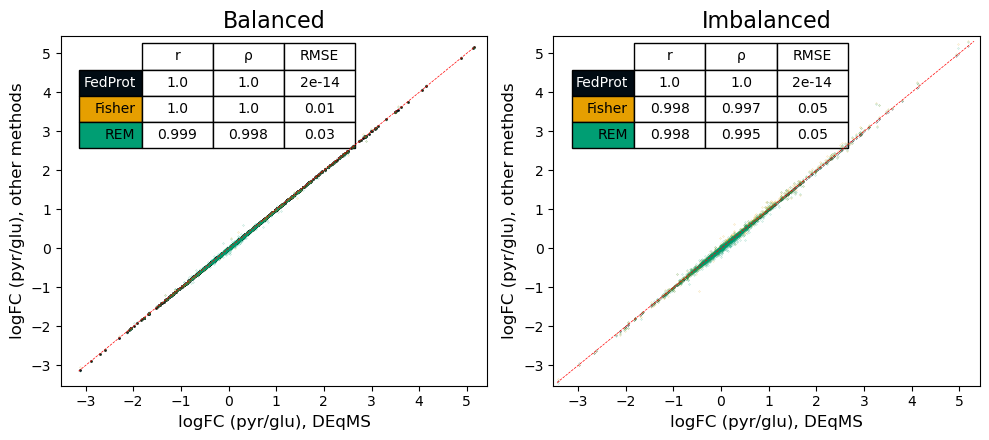

In [18]:
colors = ['#010B13', '#E69F00', '#009E73']
# colors = ["#010B13","#E69F00","#D44400","#009E73","#2E5EAA"]

# log transform p-values in dfs, but first replace 0 with tiny value
non_nan = {}
for k in dfs:
    df = dfs[k]
    non_nan_df = df.replace(0,1e-300)
    non_nan[k] = non_nan_df

corrs = plt_results_not_log(non_nan, text = "", colors = colors, what='lfc_',
                            methods=["FedProt","Fisher","REM"])
corrs

### log transform

In [114]:
# the same for log10 p-values
stats = {}
stats2  = {}

for m in ["RMSE", "ρ","r"]:
    for ds in ["Balanced", 'Imbalanced']:  # ,"Mild Imbalance","Strong Imbalance"
        df = dfs[ds].sort_values(by="pv_Rlimma",ascending = False)
        results = calc_stats(df, lfc_thr=0.58,adj_pval_thr = 0.01,
                            methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
                            log_transform = True)
        stats[(m,ds)] = results[m]
    #print(confusion_matrix)

results_rpr_10 = pd.DataFrame.from_dict(stats)
# save to file
results_rpr_10.to_csv('/home/yuliya/repos/cosybio/FedDEqMS/article/df_suppl/df_suppl_rprnpf_log10.csv')
results_rpr_10

RMSE                       ρ                    r           
              Balanced    Imbalanced  Balanced Imbalanced  Balanced Imbalanced
FedProt   3.433537e-12  6.581886e-13  1.000000   1.000000  1.000000   1.000000
Fisher    3.557716e+01  2.150149e+01  0.954032   0.952869  0.981259   0.984410
Stouffer  5.675483e+00  3.474682e+00  0.963168   0.956158  0.988413   0.987885
REM       4.503960e+01  4.545595e+01  0.913729   0.916722  0.797753   0.810198
RankProd  2.474162e+01  1.504956e+01  0.880183   0.869728  0.772330   0.773137

In [21]:
from matplotlib.table import table

def plt_results(dfs, methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
                colors=["D44500","2E5EAA","FFFB0A","47A025","010B13"], 
                what="pv_", suptitle="$-log_{10}(adj.p-values)$", text="",dotsize=1,
                datasets=["Balanced", "Imbalanced"]):
    
    fig, axes = plt.subplots(1, 2, figsize=(10,4.5), sharey=False)
    i=0
    se = 0
    results = {}
    max_xlim = 0
    min_xlim = 0

    for k in datasets:
        df = dfs[k].filter([f'{what}Rlimma']+[what+i for i in methods])
        axes[i].set_title(k,fontsize=16)
        rmse = {}
        
        for j in range(len(methods)):
            method = methods[j]
            col = colors[j]
            x = df[what+"Rlimma"].values
            y = df[what+method].values
            rmse[method] = np.sqrt(np.sum((x-y)**2)/len(x))
            axes[i].scatter(x = np.abs(x), y= np.abs(y),s=dotsize, color=col,alpha=0.5)
        
        axes[i].set_xlabel('-log10 adj.p-values (pyr/glu), DEqMS',fontsize=12)
        axes[i].set_ylabel('-log10 adj.p-values (pyr/glu), other methods',fontsize=12)
        axes[i].plot([np.min(np.abs(df.values)), np.max(np.abs(df.values))+5], 
                     [np.min(np.abs(df.values)), np.max(np.abs(df.values))+5],
                   color = "red",ls="--",lw=0.5)
     
        corrs = df[[what+"Rlimma"]+[what+m for m in methods]].corr().loc[[what+"Rlimma"],]
        corrs.rename(lambda x: x.replace(what,""), axis="columns",inplace = True)
        corrs = corrs.T.to_dict()[what+'Rlimma']
        rank_corrs = df[[what+"Rlimma"]+[what+m for m in methods]].corr(method="spearman").loc[[what+"Rlimma"],]
        rank_corrs.rename(lambda x: x.replace(what,""), axis="columns",inplace = True)
        rank_corrs = rank_corrs.T.to_dict()[what+'Rlimma']

        # Prepare data for table
        data = {}
        for j, method in enumerate(methods):
            if method == "FedProt":
                if rmse[method] < 1:
                    data[method] = [f"{round(corrs[method],3)}", f"{round(rank_corrs[method],3)}", f"{rmse[method]:.0e}"]
                else:
                    data[method] = [f"{round(corrs[method],3)}", f"{round(rank_corrs[method],3)}", f"{round(rmse[method], 2)}"]
            else:
                data[method] = [f"{round(corrs[method],3)}", f"{round(rank_corrs[method],3)}", f"{round(rmse[method],2)}"]

        # Create table for each axes
        colLabels = ["r", "ρ", "RMSE"]
        the_table = table(axes[i], cellText=list(data.values()),
                        colLabels=colLabels,
                        rowLabels=list(data.keys()),
                        cellLoc = 'center', rowLoc = 'right',
                        bbox=[0.5, 0.66, 0.5, 0.34],  
                        cellColours=[['white'] * len(colLabels) for col in colors]
                        )

        # Set font size for the entire table
        the_table.auto_set_font_size(False)
        the_table.set_fontsize(10)  # Change this value as required

        for j, label in enumerate(data.keys()):
            cell = the_table.get_celld()[(j + 1, -1)]  # get the row label cell
            cell.set_facecolor(colors[j])  # set the row label background color
            if label == "FedProt" or label == "RankProd":
                cell.get_text().set_color('white')  # set the row label text color 
            else:
                cell.get_text().set_color('black')
        i += 1
        results[(k,"r")] = corrs
        results[(k,"ρ")] = rank_corrs
        results[(k,"RMSE")] = pd.Series(rmse)

        max_xlim_method = np.max(np.abs(df[what+"Rlimma"].values))
        if what == "pv_":
            max_xlim_method = max_xlim_method + max_xlim_method*0.2
        else:
            max_xlim_method = max_xlim_method + max_xlim_method*0.05
        if max_xlim < max_xlim_method:
            max_xlim = max_xlim_method

        min_xlin_method = np.min(np.abs(df[what+"Rlimma"].values))
        min_xlin_method = min_xlin_method - max_xlim_method*0.01
        if min_xlim > min_xlin_method:
            min_xlim = min_xlin_method

    axes[0].set_xlim([min_xlim, max_xlim])
    axes[1].set_xlim([min_xlim, max_xlim])
    
    results = pd.DataFrame.from_dict(results)
    
    if text:
        tmp = axes[0].text(-0.2*np.max(df.values), np.max(df.values), text, fontsize=24)
        
    plt.tight_layout()
    return results.loc[methods,]

Balanced                         Imbalanced                        
                 r         ρ          RMSE          r         ρ          RMSE
FedProt   1.000000  1.000000  1.146815e-12   1.000000  1.000000  5.731070e-13
Fisher    0.981259  0.954032  3.557716e+01   0.984410  0.952869  2.150149e+01
Stouffer  0.988413  0.963168  5.675483e+00   0.987885  0.956158  3.474682e+00
REM       0.797753  0.913729  4.503960e+01   0.810198  0.916722  4.545595e+01
RankProd  0.772330  0.880183  2.474162e+01   0.773137  0.869728  1.504956e+01

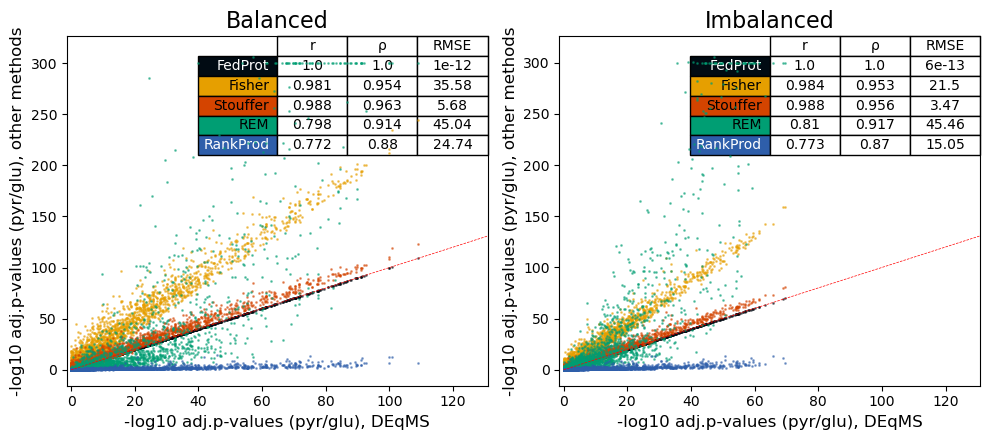

In [22]:
# colors = ['#010B13', '#E69F00', '#CC79A7', '#009E73', '#56B4E9']
colors = ["#010B13","#E69F00","#D44400","#009E73","#2E5EAA"]
#colors = ["#010B13","#D44500","#FFFB0A","#009E73","#2E5EAA"]

# log transform p-values in dfs, but first replace 0 with tiny value
log_dfs = {}
for k in dfs:
    df = dfs[k]
    df = df.replace(0,1e-300)
    df["pv_Rlimma"] = -np.log10(df["pv_Rlimma"])
    for m in ["FedProt","Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    log_dfs[k] = df



corrs = plt_results(log_dfs, text = "", colors = colors)
plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)
corrs

In [23]:
from matplotlib.colors import ListedColormap as lcmap

cmap = lcmap(["blue","skyblue","red"], name='from_list', N=None)

In [24]:
def calc_stats_log(df,lfc_thr=1, adj_pval_thr = -np.log10(0.05),
               stats=["TP","TN","FP","FN","Precision","Recall","F1","r","ρ","RMSE"],
               methods=["FedProt","Fisher","Stouffer","REM","RankProd"],top_genes=-1):
    results={}
    all_genes = set(df.index.values)

    if top_genes<=0:
        top_genes = df.shape[0]
    #de = df.sort_values(by="pv_Rlimma",ascending = False)
    de = df.loc[(df["pv_Rlimma"]>adj_pval_thr) & (np.abs(df["lfc_Rlimma"])>=lfc_thr),:]
    de = de.head(top_genes)
    
    # truth: DE and not DE genes predicted by limma
    T = set(de.index.values)
    F = all_genes.difference(T)
    #prnt("T:",len(T), "F:",len(F))
    if len(set(stats).intersection(set(["TP","TN","FP","FN","Precision","Recall","F1"])))>0:
        for m in methods:
            # prediction
            de2 = df.loc[:,["pv_"+m,"lfc_"+m]].sort_values(by="pv_"+m,ascending = False)
            de2 = de2.loc[de2["pv_"+m]>adj_pval_thr,:]
            de2 = de2.loc[np.abs(de2["lfc_"+m])>=lfc_thr,:].head(top_genes)
            P = set(de2.index.values)
            N = all_genes.difference(P)
            
            TP=len(T.intersection(P))
            FP = len(F.intersection(P))
            TN = len(F.intersection(N))
            FN = len(T.intersection(N))
            if (TP+FP)>0:
                Prec = TP*1.0/(TP+FP)
            else:
                Prec =0
            if (TP+FN) >0:
                Rec = TP*1.0/(TP+FN)
            else:
                Rec = 0
            if Prec and Rec:
                F1 = 2* (Prec*Rec)/(Prec+Rec)
            else:
                F1=0

            results[m] = {"TP":TP,"FP":FP,
                            "TN":TN,"FN":FN,
                             "Precision":Prec,"Recall":Rec, "F1":F1}

    # correlation of all p-values
    if "RMSE" in stats:
        for m in methods:
            # RMSE for -log10 p-values
            df = df.sort_values(by="pv_Rlimma",ascending = False).head(top_genes)
            x = df["pv_Rlimma"].values
            y = df["pv_"+m].values
            rmse = np.sqrt(np.sum((x-y)**2)/len(x))
            if m in results.keys():
                results[m]["RMSE"] = rmse
            else:
                results[m] = {"RMSE":rmse}
    # turn results to df if it is not empty
    if len(results.keys())>0:
        results = pd.DataFrame.from_dict(results).T
    if "r" in stats:
        df = df.sort_values(by="pv_Rlimma",ascending = False).head(top_genes)
        corrs = df[["pv_"+"Rlimma"]+["pv_"+m for m in methods]].corr().loc[["pv_"+"Rlimma"],]
        corrs.rename(lambda x: x.replace("pv_",""), axis="columns",inplace = True)
        corrs = corrs.loc[:,methods]
        corrs = corrs.T['pv_Rlimma']
        results["r"] = corrs
        
    if "ρ" in stats: 
        df = df.sort_values(by="pv_Rlimma",ascending = False).head(top_genes)
        rank_corrs = df[["pv_"+"Rlimma"]+["pv_"+m for m in methods]].corr(method="spearman").loc[["pv_"+"Rlimma"],]
        rank_corrs.rename(lambda x: x.replace("pv_",""), axis="columns",inplace = True)
        rank_corrs = rank_corrs.loc[:,methods]
        rank_corrs = rank_corrs.T['pv_Rlimma']
        results["ρ"] = rank_corrs
    
    # turn results to df if it is still a dict
    if type(results)==dict:
        results = pd.DataFrame.from_dict(results)
    return results.loc[:,stats]

In [25]:
def plot_stats_for_topN(dfs,
                        datasets = ["Balance","Mild Imbalance","Strong Imbalance"],
                        metrics=["F1"],
                        methods = ["FedProt","Fisher","Stouffer","REM","RankProd"],
                        colors = ["red","blue","cyan","lightgreen","grey"],
                        min_n_genes=10,max_n_genes = 1000, step=10, 
                        text="",
                        log=False,figfile= "",suptitle="", sharey=False,
                        lfc_thr=1.0, adj_pval_thr = -np.log10(0.05)):
    
    """Calculated and plots statisctics for top N genes ordered by p-value. 
   Top genes are chosen based on a sliding threshold, starting from 'min_n_genes' and moving to 'max_n_genes' with 'step'."""
    cmap = lcmap(colors, name='from_list', N=None)
    fig, all_axes = plt.subplots(len(metrics), len(datasets), figsize=(13,4*len(metrics)), sharey=sharey)
    all_stats ={}
    min_ylim = {}
    max_ylim = {}
    
    for k in range(len(metrics)):
        metric = metrics[k]
        all_stats[metric]={}
        if len(metrics)==1:
            axes = all_axes
        else:
            axes = all_axes[k]
        for i in range(len(datasets)):
            ds = datasets[i]
            df = dfs[ds]
            df = df.sort_values(by="pv_Rlimma",ascending = False)
            n_genes = df.shape[0]
            stats  = {}
            top_n_genes = np.arange(min_n_genes,max_n_genes,step)
            for j in range(len(top_n_genes)): #
                confusion_matrix = calc_stats_log(df ,lfc_thr, adj_pval_thr,
                                                  stats=[metric],
                                                  methods=methods,top_genes=top_n_genes[j])
                stats[top_n_genes[j]] = confusion_matrix[metric]
            stats = pd.DataFrame.from_dict(stats)
            stats.T.plot(ax =  axes[i],cmap = cmap)
            min_ylim[metric] = min(min_ylim.get(metric, float('inf')), stats.values.min())
            max_ylim[metric] = max(max_ylim.get(metric, float('-inf')), stats.values.max())

            if log:
                axes[i].set_yscale('log')
            #print(stats)
            if k==len(metrics)-1:
                tmp = axes[i].set_xlabel("number of top-ranked proteins",fontsize=14)
            if i ==0:
                if log:
                    tmp = axes[i].set_ylabel("$log_{10}($"+metric+"$)$",fontsize=24)
                else:
                    if metric == 'RMSE':
                        tmp = axes[i].set_ylabel(f'{metric}, -log10(p-values)', fontsize=18)
                    else:
                        tmp = axes[i].set_ylabel(metric,fontsize=18)
                if text:
                    tmp = axes[0].text(-0.15*max_n_genes, np.max(stats.values)*1.0, text, fontsize=24)
            if i >0 or k!=len(metrics)-1:
                axes[i].get_legend().remove()
            if k==0:
                tmp = axes[i].set_title(ds,fontsize=20)
            all_stats[metric][ds] = stats

    for k in range(len(metrics)):
        metric = metrics[k]
        for i in range(len(datasets)):
            if log:
                all_axes[k][i].set_yscale('log')
            if len(metrics) > 1:
                all_axes[k][i].set_ylim(min_ylim[metric] - 0.1 * (max_ylim[metric] - min_ylim[metric]), 
                                    max_ylim[metric] + 0.1 * (max_ylim[metric] - min_ylim[metric]))


    if suptitle:
        fig.suptitle(suptitle,fontsize=24)
    if figfile:
        fig.savefig(figfile)
    return all_stats


In [26]:
min(len(log_dfs['Balanced'].loc[(log_dfs['Balanced']['pv_Rlimma'] > -np.log10(0.01)) & (log_dfs['Balanced']['lfc_Rlimma'] > 0.58),:].index.values),
    len(log_dfs['Imbalanced'].loc[(log_dfs['Imbalanced']['pv_Rlimma'] > -np.log10(0.01)) & (log_dfs['Imbalanced']['lfc_Rlimma'] > 0.58),:].index.values))

352

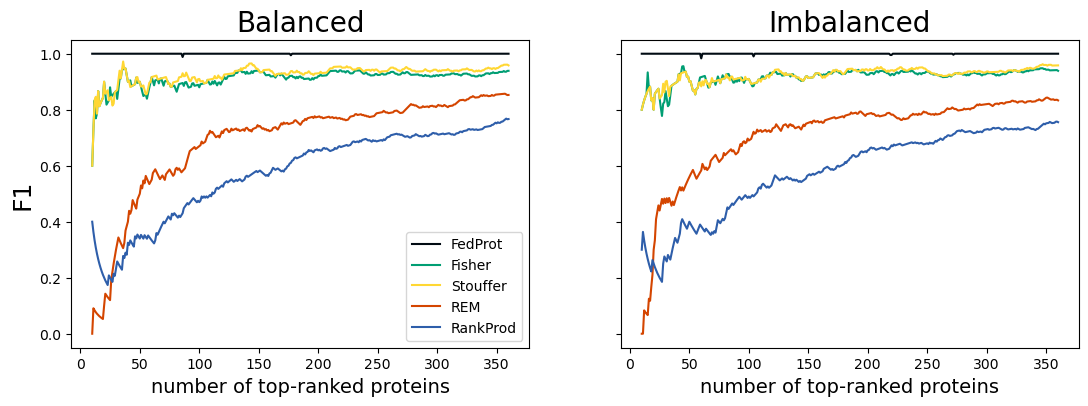

In [67]:
n_DE_genes = round(max(len(log_dfs['Balanced'].loc[(log_dfs['Balanced']['pv_Rlimma'] > -np.log10(0.01)) & (log_dfs['Balanced']['lfc_Rlimma'] > 0.58),:].index.values),
    len(log_dfs['Imbalanced'].loc[(log_dfs['Imbalanced']['pv_Rlimma'] > -np.log10(0.01)) & (log_dfs['Imbalanced']['lfc_Rlimma'] > 0.58),:].index.values)) / 10) * 10

# colors = ['black', '#33FF57', '#5733FF', '#FF33D4', '#FFD733']
# colors = ['#010B13', '#D44500', '#FFFB0A', '#009E73', '#2E5EAA']
colors = ['#010B13', '#009E73', '#FFD733', '#D44500', '#2E5EAA']

min_n_genes = 10
step = 1
max_n_genes = n_DE_genes + step

data = plot_stats_for_topN(log_dfs,
                           datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["F1"],
                           min_n_genes=min_n_genes,
                           max_n_genes = max_n_genes,
                           step=step,
                           colors=colors,
                           sharey=True,
                           lfc_thr=0.58, adj_pval_thr = -np.log10(0.01))

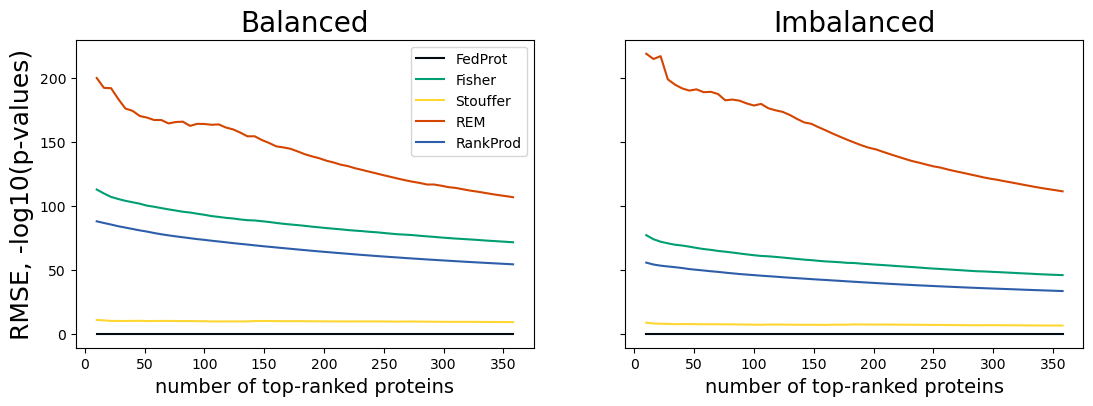

In [28]:
colors = ['#010B13', '#009E73', '#FFD733', '#D44500', '#2E5EAA']
data = plot_stats_for_topN(log_dfs,
                           datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["RMSE"],
                           min_n_genes=min_n_genes,
                           max_n_genes = n_DE_genes, 
                           step=step,
                           colors=colors,
                           sharey=True,
                           #suptitle = "GTEx skin: sun-exposed vs not exposed",
                           #figfile="../../paper_v1/Supplementary/FigS3_RMSE_corr_GTEx.png"
                           
                           lfc_thr=0.58, adj_pval_thr = -np.log10(0.01)
                           )

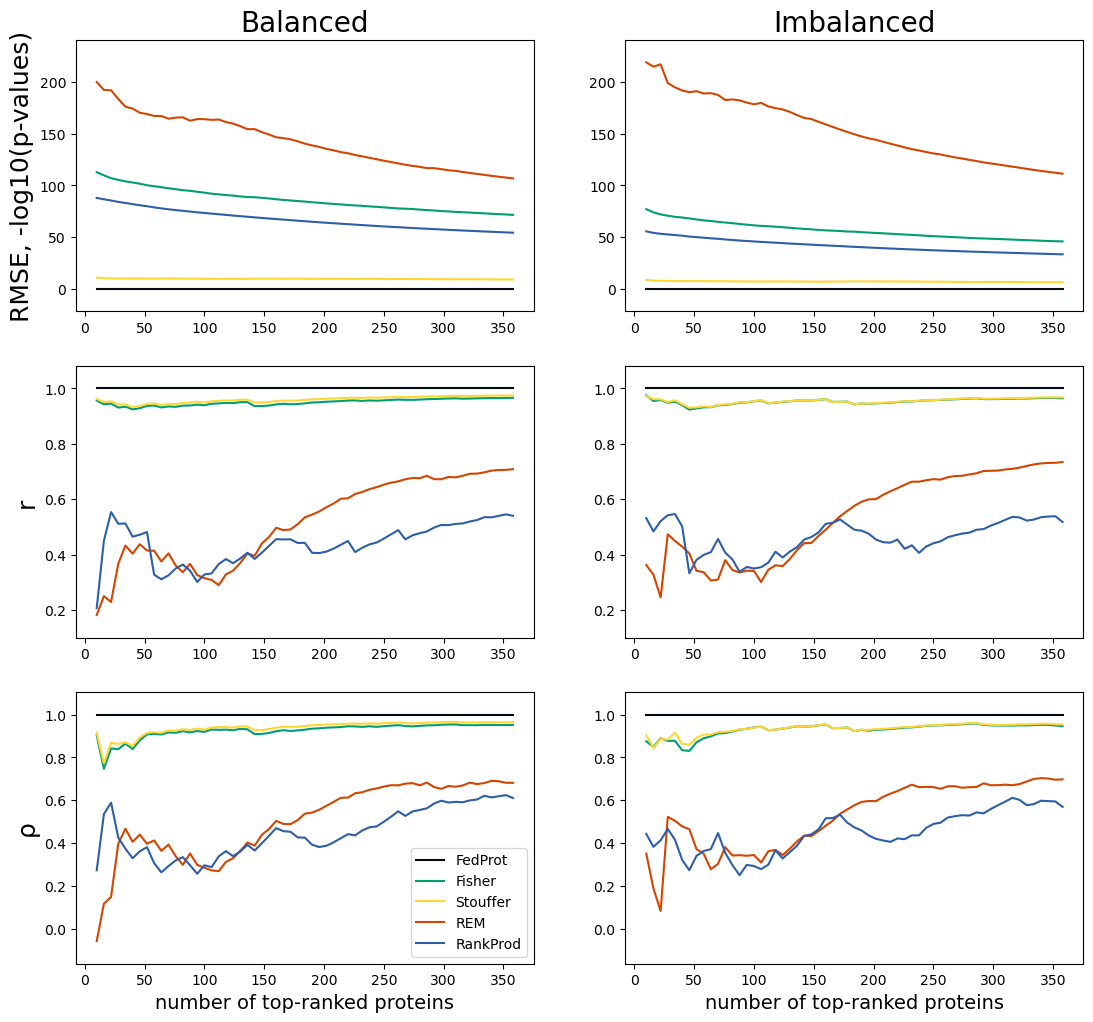

In [29]:
colors = ['#010B13', '#009E73', '#FFD733', '#D44500', '#2E5EAA']
data = plot_stats_for_topN(log_dfs,
                           datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["RMSE", "r","ρ"],
                           min_n_genes=min_n_genes,
                           max_n_genes = n_DE_genes, 
                           step=step,
                           colors=colors,
                            # sharey=True
                           #suptitle = "GTEx skin: sun-exposed vs not exposed",
                           #figfile="../../paper_v1/Supplementary/FigS3_RMSE_corr_GTEx.png",                          ,
                           lfc_thr=0.58, adj_pval_thr = -np.log10(0.01)
                           )

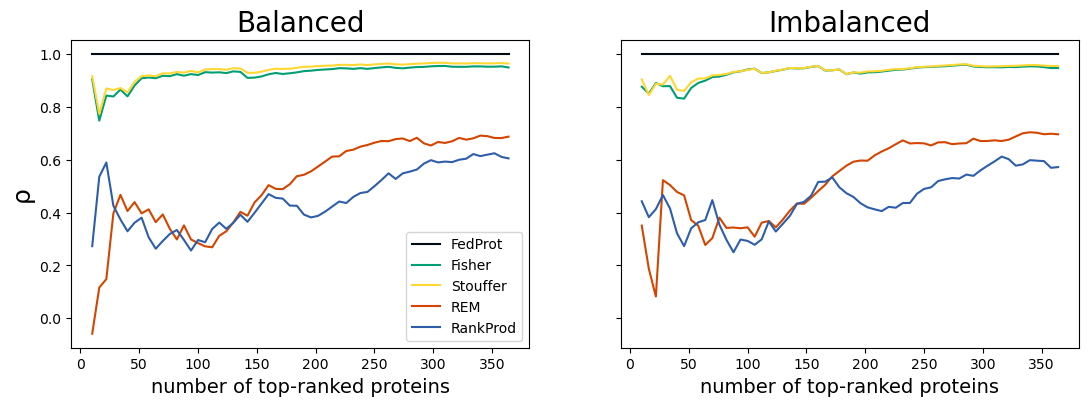

In [30]:
n_DE_genes = round(max(len(log_dfs['Balanced'].loc[(log_dfs['Balanced']['pv_Rlimma'] > -np.log10(0.01)) & (log_dfs['Balanced']['lfc_Rlimma'] > 0.58),:].index.values),
    len(log_dfs['Imbalanced'].loc[(log_dfs['Imbalanced']['pv_Rlimma'] > -np.log10(0.01)) & (log_dfs['Imbalanced']['lfc_Rlimma'] > 0.58),:].index.values)) / 10) * 10

# colors = ['black', '#33FF57', '#5733FF', '#FF33D4', '#FFD733']
# colors = ['#010B13', '#D44500', '#FFFB0A', '#009E73', '#2E5EAA']
colors = ['#010B13', '#009E73', '#FFD733', '#D44500', '#2E5EAA']

min_n_genes = 10
step = 6
max_n_genes = n_DE_genes + step

data = plot_stats_for_topN(log_dfs,
                           datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["ρ"],
                           min_n_genes=min_n_genes,
                           max_n_genes = max_n_genes,
                           step=step,
                           colors=colors,
                           sharey=True,
                           lfc_thr=3, adj_pval_thr = -np.log10(0.01))

In [ ]:
def calc_stats_log_LOGFC(df,lfc_thr=1, adj_pval_thr = -np.log10(0.05),
               stats=["TP","TN","FP","FN","Precision","Recall","F1","r","ρ","RMSE"],
               methods=["FedProt","Fisher","Stouffer","REM","RankProd"],top_genes=-1):
    results={}
    all_genes = set(df.index.values)

    if top_genes<=0:
        top_genes = df.shape[0]
    #de = df.sort_values(by="pv_Rlimma",ascending = False)
    de = df.loc[(df["pv_Rlimma"]>adj_pval_thr) & (np.abs(df["lfc_Rlimma"])>=lfc_thr),:]
    de = de.head(top_genes)

    
    
    # correlation of all p-values
    if "RMSE" in stats:
        for m in methods:
            # RMSE for -log10 p-values
            df = df.sort_values(by="pv_Rlimma",ascending = False)
            df = df.loc[np.abs(df["lfc_Rlimma"])>=lfc_thr,:]  ## ADDitional filter
            df = df.head(top_genes)
            x = df["pv_Rlimma"].values
            y = df["pv_"+m].values
            rmse = np.sqrt(np.sum((x-y)**2)/len(x))
            if m in results.keys():
                results[m]["RMSE"] = rmse
            else:
                results[m] = {"RMSE":rmse}
    # turn results to df if it is not empty
    if len(results.keys())>0:
        results = pd.DataFrame.from_dict(results).T
    if "r" in stats:
        df = df.sort_values(by="pv_Rlimma",ascending = False)
        df = df.loc[np.abs(df["lfc_Rlimma"])>=lfc_thr,:]  ## ADDitional filter
        df = df.head(top_genes)
        corrs = df[["pv_"+"Rlimma"]+["pv_"+m for m in methods]].corr().loc[["pv_"+"Rlimma"],]
        corrs.rename(lambda x: x.replace("pv_",""), axis="columns",inplace = True)
        corrs = corrs.loc[:,methods]
        corrs = corrs.T['pv_Rlimma']
        results["r"] = corrs
        
    if "ρ" in stats: 
        df = df.sort_values(by="pv_Rlimma",ascending = False)
        df = df.loc[np.abs(df["lfc_Rlimma"])>=lfc_thr,:]  ## ADDitional filter
        df = df.head(top_genes)
        rank_corrs = df[["pv_"+"Rlimma"]+["pv_"+m for m in methods]].corr(method="spearman").loc[["pv_"+"Rlimma"],]
        rank_corrs.rename(lambda x: x.replace("pv_",""), axis="columns",inplace = True)
        rank_corrs = rank_corrs.loc[:,methods]
        rank_corrs = rank_corrs.T['pv_Rlimma']
        results["ρ"] = rank_corrs
    
    # turn results to df if it is still a dict
    if type(results)==dict:
        results = pd.DataFrame.from_dict(results)
    return results.loc[:,stats]

In [ ]:
def plot_stats_for_topN_LOGFC(dfs,
                        datasets = ["Balance","Mild Imbalance","Strong Imbalance"],
                        metrics=["F1"],
                        methods = ["FedProt","Fisher","Stouffer","REM","RankProd"],
                        colors = ["red","blue","cyan","lightgreen","grey"],
                        min_n_genes=10,max_n_genes = 1000, step=10, 
                        text="",
                        log=False,figfile= "",suptitle="", sharey=False,
                        lfc_thr=1.0, adj_pval_thr = -np.log10(0.05)):
    
    """Calculated and plots statisctics for top N genes ordered by p-value. 
   Top genes are chosen based on a sliding threshold, starting from 'min_n_genes' and moving to 'max_n_genes' with 'step'."""
    cmap = lcmap(colors, name='from_list', N=None)
    fig, all_axes = plt.subplots(len(metrics), len(datasets), figsize=(13,4*len(metrics)), sharey=sharey)
    all_stats ={}
    min_ylim = {}
    max_ylim = {}
    
    for k in range(len(metrics)):
        metric = metrics[k]
        all_stats[metric]={}
        if len(metrics)==1:
            axes = all_axes
        else:
            axes = all_axes[k]
        for i in range(len(datasets)):
            ds = datasets[i]
            df = dfs[ds]
            df = df.sort_values(by="pv_Rlimma",ascending = False)
            n_genes = df.shape[0]
            stats  = {}
            top_n_genes = np.arange(min_n_genes,max_n_genes,step)
            for j in range(len(top_n_genes)): #
                confusion_matrix = calc_stats_log_LOGFC(df ,lfc_thr, adj_pval_thr,
                                                  stats=[metric],
                                                  methods=methods,top_genes=top_n_genes[j])
                stats[top_n_genes[j]] = confusion_matrix[metric]
            stats = pd.DataFrame.from_dict(stats)
            stats.T.plot(ax =  axes[i],cmap = cmap)
            min_ylim[metric] = min(min_ylim.get(metric, float('inf')), stats.values.min())
            max_ylim[metric] = max(max_ylim.get(metric, float('-inf')), stats.values.max())

            if log:
                axes[i].set_yscale('log')
            #print(stats)
            if k==len(metrics)-1:
                tmp = axes[i].set_xlabel("number of top-ranked proteins",fontsize=14)
            if i ==0:
                if log:
                    tmp = axes[i].set_ylabel("$log_{10}($"+metric+"$)$",fontsize=24)
                else:
                    if metric == 'RMSE':
                        tmp = axes[i].set_ylabel(f'{metric}, -log10(p-values)', fontsize=18)
                    else:
                        tmp = axes[i].set_ylabel(metric,fontsize=18)
                if text:
                    tmp = axes[0].text(-0.15*max_n_genes, np.max(stats.values)*1.0, text, fontsize=24)
            if i >0 or k!=len(metrics)-1:
                axes[i].get_legend().remove()
            if k==0:
                tmp = axes[i].set_title(ds,fontsize=20)
            all_stats[metric][ds] = stats

    for k in range(len(metrics)):
        metric = metrics[k]
        for i in range(len(datasets)):
            if log:
                all_axes[k][i].set_yscale('log')
            if len(metrics) > 1:
                all_axes[k][i].set_ylim(min_ylim[metric] - 0.1 * (max_ylim[metric] - min_ylim[metric]), 
                                    max_ylim[metric] + 0.1 * (max_ylim[metric] - min_ylim[metric]))


    if suptitle:
        fig.suptitle(suptitle,fontsize=24)
    if figfile:
        fig.savefig(figfile)
    return all_stats


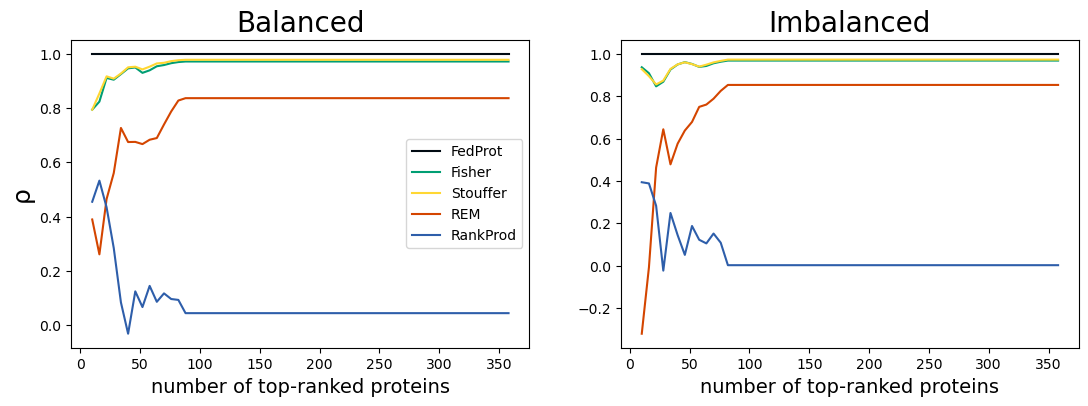

In [ ]:
colors = ['#010B13', '#009E73', '#FFD733', '#D44500', '#2E5EAA']
data = plot_stats_for_topN_LOGFC(log_dfs,
                           datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["ρ"],
                           min_n_genes=min_n_genes,
                           max_n_genes = n_DE_genes, 
                           step=step,
                           colors=colors,
                            # sharey=True
                           #suptitle = "GTEx skin: sun-exposed vs not exposed",
                           #figfile="../../paper_v1/Supplementary/FigS3_RMSE_corr_GTEx.png",                          ,
                           lfc_thr=2, adj_pval_thr = -np.log10(0.01)
                           )

In [ ]:
def calc_stats_LFC(df, 
                   stats=["MeanDiff", "LogMeanDiff", "RMSE"],
                   methods=["FedProt","Fisher","REM"],
                   top_genes=-1):
    results={}

    if top_genes<=0:
        top_genes = df.shape[0]
    #de = df.sort_values(by="pv_Rlimma",ascending = False)
    df = df.sort_values(by="pv_Rlimma",ascending = False).head(top_genes)

    for m in methods:

        x = df["lfc_Rlimma"]
        y = df["lfc_"+m]
        
        diff = x - y

        if "MeanDiff" in stats:
            mean_diff = np.mean(np.abs(diff))
            if m in results.keys():
                results[m]["MeanDiff"] = mean_diff
            else:
                results[m] = {"MeanDiff": mean_diff}

        if 'MaxDiff' in stats:
            # change zeros to tiny values
            diff[diff == 0] = 1e-100
            max_dif = np.max((np.abs(diff)))
            if m in results.keys():
                results[m]["MaxDiff"] = max_dif
            else:
                results[m] = {"MaxDiff": max_dif}
                
        if "RMSE" in stats:
            rmse = np.sqrt(np.sum((x-y)**2)/len(x))
            if m in results.keys():
                results[m]["RMSE"] = rmse
            else:
                results[m] = {"RMSE": rmse}

        if "r" in stats:
            corrs = x.corr(y)
            if m in results.keys():
                results[m]["r"] = corrs
            else:
                results[m] = {"r": corrs}
            
        if "ρ" in stats: 
            rank_corrs = x.corr(y, method="spearman")
            if m in results.keys():
                results[m]["ρ"] = rank_corrs
            else:
                results[m] = {"ρ": rank_corrs}
    
    # turn results to df if it is still a dict
    if type(results)==dict:
        results = pd.DataFrame.from_dict(results).T
    
    return results.loc[:,stats]

In [ ]:
def plot_stats_for_topN_LFC(dfs,datasets = ["Balance","Mild Imbalance","Strong Imbalance"],
                            metrics=["MeanDiff", "MaxDiff", "RMSE"],
                            methods = ["FedProt","Fisher","REM"],
                            colors = ["red","blue","cyan","lightgreen","grey"],
                            min_n_genes=10, max_n_genes = 1000, step=10, 
                            text="",log=False,figfile= "",suptitle=""):

    cmap = lcmap(colors, name='from_list', N=None)
    fig, all_axes = plt.subplots(len(metrics), len(datasets), figsize=(12,4*len(metrics)), sharey=False)
    
    # Ensure all_axes is always a 2D array
    if len(metrics) == 1:
        all_axes = [all_axes]
    if len(datasets) == 1:
        for k in range(len(metrics)):
            all_axes[k] = [all_axes[k]]

    all_stats ={}
    min_ylim = {}
    max_ylim = {}

    for k in range(len(metrics)):
        metric = metrics[k]
        all_stats[metric]={}

        for i in range(len(datasets)):
            ds = datasets[i] 
            df = np.abs(dfs[ds])
            # df = df.sort_values(by="pv_Rlimma", ascending = False)
            df = df.sort_values(by="lfc_Rlimma", ascending = False)
            stats  = {}
            top_n_genes = np.arange(min_n_genes, max_n_genes, step)

            for j in range(len(top_n_genes)):
                confusion_matrix = calc_stats_LFC(df, 
                                                stats=[metric],
                                                methods=methods,
                                                top_genes=top_n_genes[j])
                stats[top_n_genes[j]] = confusion_matrix[metric]

            stats = pd.DataFrame.from_dict(stats)
            stats.T.plot(ax =  all_axes[k][i], cmap = cmap)
            min_ylim[metric] = min(min_ylim.get(metric, float('inf')), stats.values.min())
            max_ylim[metric] = max(max_ylim.get(metric, float('-inf')), stats.values.max())

            if k==len(metrics)-1:
                all_axes[k][i].set_xlabel("number of top-ranked proteins",fontsize=14)
            if i ==0:
                if log:
                    all_axes[k][i].set_ylabel("$log_{10}($"+metric+"$)$",fontsize=24)
                else:
                    all_axes[k][i].set_ylabel(f'{metric}, logFC' ,fontsize=18)
                if text:
                    all_axes[k][i].text(-0.15*max_n_genes, np.max(stats.values)*1.0, text, fontsize=24)
            if i >0 or k!=len(metrics)-1:
                all_axes[k][i].get_legend().remove()
            if k==0:
                all_axes[k][i].set_title(ds, fontsize=16)
            all_stats[metric][ds] = stats

    for k in range(len(metrics)):
        metric = metrics[k]
        for i in range(len(datasets)):
            if log:
                all_axes[k][i].set_yscale('log')

            all_axes[k][i].set_ylim(min_ylim[metric] - 0.1 * (max_ylim[metric] - min_ylim[metric]), 
                                    max_ylim[metric] + 0.1 * (max_ylim[metric] - min_ylim[metric]))

    if suptitle:
        fig.suptitle(suptitle, fontsize=24)
    if figfile:
        fig.savefig(figfile)
    return all_stats


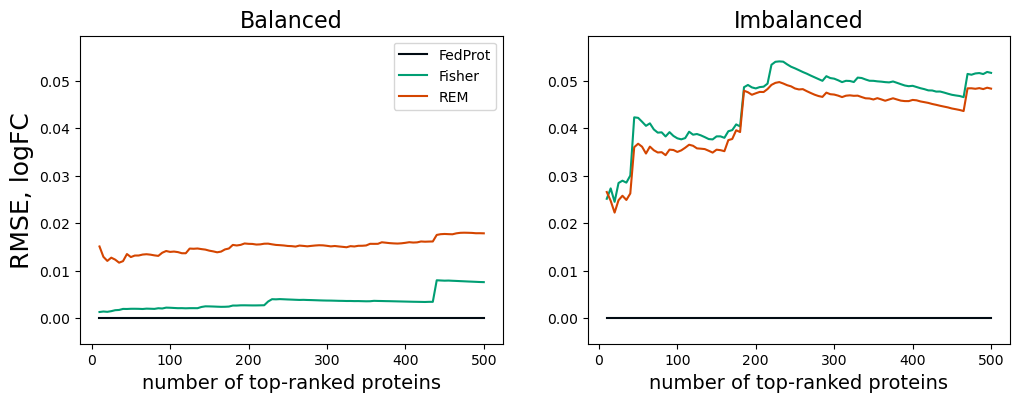

In [ ]:

n_DE_genes = 500

colors = ['#010B13', '#009E73', '#D44500']


min_n_genes = 10
step = 5
max_n_genes = n_DE_genes + step

data = plot_stats_for_topN_LFC(log_dfs,
                      datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                      metrics=["RMSE"],
                      min_n_genes=min_n_genes,
                      max_n_genes = max_n_genes,
                      step=step,
                      colors=colors)

# Comparsion with DEqMS on corrected data
## Balanced + Imbalanced

In [43]:
central_results_balanced = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/03_HR_comparison/balanced/result_deqms_HR.tsv', index_col=0, sep='\t')
central_results_balanced = central_results_balanced.loc[log_dfs['Balanced'].index.values, ['logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B', 'sca.t', 'sca.P.Value', 'sca.adj.pval']]
print(central_results_balanced.shape)
central_results_balanced.head(5)

(2254, 9)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,sca.t,sca.P.Value,sca.adj.pval
PG,,,,,,,,,
A5A614,0.933289,17.728832,10.530002,1.564208e-18,4.283992e-18,30.310185,10.513388,1.323966e-18,3.626026e-18
P00350,-0.216236,25.344763,-10.116011,9.608435e-18,2.559978e-17,28.454656,-10.241913,3.835673e-18,1.034164e-17
P00363,0.106706,23.245479,2.452498,1.563451e-02,1.932027e-02,-5.827696,2.480677,1.447610e-02,1.789859e-02
P00370,-0.532337,24.632763,-13.671074,3.572082e-26,1.353189e-25,47.881365,-13.826822,9.711061e-27,3.741663e-26
P00393,-0.102384,22.550630,-3.340325,1.117553e-03,1.500277e-03,-3.409053,-3.375990,9.870520e-04,1.332225e-03


In [44]:
central_results_unbalanced = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/03_HR_comparison/unbalanced/result_deqms_HR.tsv', index_col=0, sep='\t')
central_results_unbalanced = central_results_unbalanced.loc[log_dfs['Imbalanced'].index.values, ['logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B', 'sca.t', 'sca.P.Value', 'sca.adj.pval']]
print(central_results_unbalanced.shape)
central_results_unbalanced.head(5)

(2259, 9)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,sca.t,sca.P.Value,sca.adj.pval
PG,,,,,,,,,
A5A614,0.849164,17.834089,7.618910,4.386316e-11,1.086479e-10,13.545800,7.604225,3.947157e-11,9.723693e-11
O32583,0.350644,19.013136,2.836114,5.808701e-03,7.943012e-03,-4.666253,2.838754,5.721457e-03,7.814252e-03
P00350,-0.213095,25.324208,-7.596336,4.279500e-11,1.062351e-10,13.543338,-7.713908,2.110728e-11,5.309726e-11
P00363,0.123348,23.256221,2.064368,4.212942e-02,5.263847e-02,-6.477342,2.097554,3.891105e-02,4.880625e-02
P00370,-0.546208,24.598179,-10.542759,6.046668e-17,2.154483e-16,27.006917,-10.711002,1.898330e-17,6.883350e-17


#### comparsion with only FedProt

In [42]:
# read fedprot onve again
fed_prot_balanced = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/balanced/results.FedProt.tsv', index_col=0, sep='\t')
fed_prot_balanced = fed_prot_balanced.loc[log_dfs['Balanced'].index.values, ['logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B', 'sca.t', 'sca.P.Value', 'sca.adj.pval']]

fed_prot_imbalanced = pd.read_csv('/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation_on_scap/unbalanced/results.FedProt.tsv', index_col=0, sep='\t')
fed_prot_imbalanced = fed_prot_imbalanced.loc[log_dfs['Imbalanced'].index.values, ['logFC', 'AveExpr', 't', 'P.Value', 'adj.P.Val', 'B', 'sca.t', 'sca.P.Value', 'sca.adj.pval']]

In [45]:
# mean, max and min difference for p-val between central results and FedProt from dfs
diff = np.abs(central_results_balanced['sca.adj.pval'].values - fed_prot_balanced['sca.adj.pval'].values)

max_val = np.max(diff)
mean_val = np.mean(diff)

print(f'Balanced: \tmax = {round(max_val, 4)}, mean = {round(mean_val, 4)}')

diff = np.abs(central_results_unbalanced['sca.adj.pval'].values - fed_prot_imbalanced['sca.adj.pval'].values)

max_val = np.max(diff)
mean_val = np.mean(diff)

print(f'Imbalanced: \tmax = {round(max_val, 4)}, mean = {round(mean_val, 4)}')


Balanced: 	max = 0.2747, mean = 0.0016
Imbalanced: 	max = 0.2079, mean = 0.0072


In [48]:
# mean, max and min difference for p-val between central results and FedProt from dfs
diff = np.abs(-np.log10(central_results_balanced['sca.adj.pval']).values - -np.log10(fed_prot_balanced['sca.adj.pval']).values)

max_val = np.max(diff)
mean_val = np.mean(diff)

print(f'Balanced: \tmax = {round(max_val, 4)}, mean = {round(mean_val, 4)}')

diff = np.abs(-np.log10(central_results_unbalanced['sca.adj.pval']).values - -np.log10(fed_prot_imbalanced['sca.adj.pval']).values)

max_val = np.max(diff)
mean_val = np.mean(diff)

print(f'Imbalanced: \tmax = {round(max_val, 4)}, mean = {round(mean_val, 4)}')


Balanced: 	max = 7.3272, mean = 0.6265
Imbalanced: 	max = 6.2717, mean = 1.2449


In [46]:
# mean, max and min difference for p-val between central results and FedProt from dfs
diff = np.abs(central_results_balanced['logFC'].values - fed_prot_balanced['logFC'].values)

max_val = np.max(diff)
mean_val = np.mean(diff)

print(f'Balanced: \tmax = {round(max_val, 4)}, mean = {round(mean_val, 4)}')

diff = np.abs(central_results_unbalanced['logFC'].values - fed_prot_imbalanced['logFC'].values)

max_val = np.max(diff)
mean_val = np.mean(diff)

print(f'Imbalanced: \tmax = {round(max_val, 4)}, mean = {round(mean_val, 4)}')


Balanced: 	max = 0.0, mean = 0.0
Imbalanced: 	max = 0.0, mean = 0.0


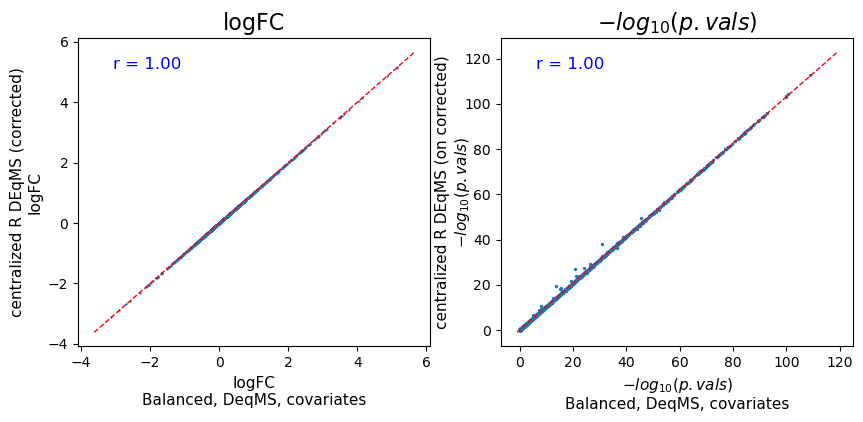

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=False)
axes[0].set_title("logFC", fontsize=16)
axes[0].scatter(x=log_dfs['Balanced']["lfc_Rlimma"], y = central_results_balanced["logFC"], s=0.5)

# Calculate the Pearson correlation coefficients
corr_coeff_logFC = np.corrcoef(log_dfs['Balanced']["lfc_Rlimma"].values, central_results_balanced["logFC"])[0,1]
corr_coeff_pvals = np.corrcoef(log_dfs['Balanced']["pv_Rlimma"].values, -np.log10(central_results_balanced["sca.adj.pval"].values))[0,1]

# Add correlation coefficient to the plots using annotate
axes[0].annotate(f'r = {corr_coeff_logFC:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')

axes[1].annotate(f'r = {corr_coeff_pvals:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')


xmin = np.min(log_dfs['Balanced']["lfc_Rlimma"])
xmax = np.max(log_dfs['Balanced']["lfc_Rlimma"])
ymin = np.min(central_results_balanced["logFC"])
ymax = np.max(central_results_balanced["logFC"])
axes[0].plot([xmin-0.5,xmax+0.5],[xmin-0.5,xmax+0.5],color = "red", linestyle='dashed',linewidth=1)
axes[0].set_xlabel('logFC\nBalanced, DeqMS, covariates', fontsize=11)
axes[0].set_ylabel('centralized R DEqMS (corrected)\nlogFC', fontsize=11)


# Improve title aesthetics
axes[1].set_title("$-log_{10}(p.vals)$", fontsize=16)
axes[1].scatter(x=log_dfs['Balanced']["pv_Rlimma"].values, y = -np.log10(central_results_balanced["sca.adj.pval"].values),s=2)
axes[1].set_xlabel('$-log_{10}(p.vals)$\nBalanced, DeqMS, covariates', fontsize=11)

xmax = max(log_dfs['Balanced']["pv_Rlimma"])
ymax = max(-np.log10(central_results_balanced["sca.adj.pval"].values))
axes[1].plot([-1,xmax+10],[-1,ymax+10],color = "red", linestyle='dashed',linewidth=1)
tmp = axes[1].set_ylabel('centralized R DEqMS (on corrected)\n$-log_{10}(p.vals)$', fontsize=11, labelpad=-5)


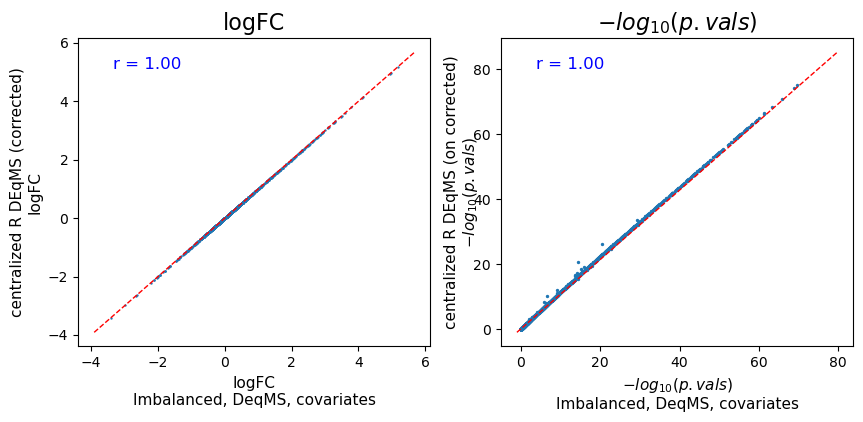

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=False)
axes[0].set_title("logFC", fontsize=16)
axes[0].scatter(x=log_dfs['Imbalanced']["lfc_Rlimma"], y = central_results_unbalanced["logFC"], s=0.5)

# Calculate the Pearson correlation coefficients
corr_coeff_logFC = np.corrcoef(log_dfs['Imbalanced']["lfc_Rlimma"].values, central_results_unbalanced["logFC"])[0,1]
corr_coeff_pvals = np.corrcoef(log_dfs['Imbalanced']["pv_Rlimma"].values, -np.log10(central_results_unbalanced["sca.adj.pval"].values))[0,1]

# Add correlation coefficient to the plots using annotate
axes[0].annotate(f'r = {corr_coeff_logFC:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')

axes[1].annotate(f'r = {corr_coeff_pvals:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')


xmin = np.min(log_dfs['Imbalanced']["lfc_Rlimma"])
xmax = np.max(log_dfs['Imbalanced']["lfc_Rlimma"])
ymin = np.min(central_results_unbalanced["logFC"])
ymax = np.max(central_results_unbalanced["logFC"])
axes[0].plot([xmin-0.5,xmax+0.5],[xmin-0.5,xmax+0.5],color = "red", linestyle='dashed',linewidth=1)
axes[0].set_xlabel('logFC\nImbalanced, DeqMS, covariates', fontsize=11)
axes[0].set_ylabel('centralized R DEqMS (corrected)\nlogFC', fontsize=11)


# Improve title aesthetics
axes[1].set_title("$-log_{10}(p.vals)$", fontsize=16)
axes[1].scatter(x=log_dfs['Imbalanced']["pv_Rlimma"].values, y = -np.log10(central_results_unbalanced["sca.adj.pval"].values),s=2)
axes[1].set_xlabel('$-log_{10}(p.vals)$\nImbalanced, DeqMS, covariates', fontsize=11)

xmax = max(log_dfs['Imbalanced']["pv_Rlimma"])
ymax = max(-np.log10(central_results_unbalanced["sca.adj.pval"].values))
axes[1].plot([-1,xmax+10],[-1,ymax+10],color = "red", linestyle='dashed',linewidth=1)
tmp = axes[1].set_ylabel('centralized R DEqMS (on corrected)\n$-log_{10}(p.vals)$', fontsize=11, labelpad=-5)


In [51]:
log_dfs_HR = {}
log_dfs_HR['Balanced'] = log_dfs['Balanced'].copy()
log_dfs_HR['Imbalanced'] = log_dfs['Imbalanced'].copy()

log_dfs_HR['Balanced']['pv_Rlimma'] = -np.log10(central_results_balanced['sca.adj.pval'].values)
log_dfs_HR['Balanced']['lfc_Rlimma'] = central_results_balanced['logFC'].values

log_dfs_HR['Imbalanced']['pv_Rlimma'] = -np.log10(central_results_unbalanced['sca.adj.pval'].values)
log_dfs_HR['Imbalanced']['lfc_Rlimma'] = central_results_unbalanced['logFC'].values

In [52]:
calculate_differences(log_dfs_HR, pval=True)


Balanced                                Imbalanced  \
         p-value difference                        p-value difference   
                        min       mean         max                min   
FedProt            0.000004   0.626499    7.327216           0.000042   
Fisher             0.000992  25.231003  131.101116           0.005875   
Stouffer           0.001132   3.515973   25.709356           0.000063   
REM                0.000209  17.497331  260.553277           0.000399   
RankProd           0.000359  16.779640  105.998941           0.001409   

                                 
                                 
               mean         max  
FedProt    1.244904    6.271682  
Fisher    13.268053   84.824042  
Stouffer   1.656019   20.971079  
REM       15.663273  261.043633  
RankProd  10.883828   68.560326

In [53]:
calculate_differences(log_dfs_HR, pval=False)

Balanced                                   Imbalanced  \
         logFC difference                             logFC difference   
                      min          mean           max              min   
FedProt      0.000000e+00  1.200453e-14  5.684342e-14     0.000000e+00   
Fisher       1.013363e-07  3.008852e-03  2.202413e-01     4.820176e-06   
Stouffer     1.013363e-07  3.008852e-03  2.202413e-01     4.820176e-06   
REM          1.338255e-05  1.695829e-02  3.017293e-01     8.978336e-07   
RankProd     1.013363e-07  3.008852e-03  2.202413e-01     4.820176e-06   

                                      
                                      
                  mean           max  
FedProt   1.039411e-14  4.612977e-14  
Fisher    2.899771e-02  6.353305e-01  
Stouffer  2.899771e-02  6.353305e-01  
REM       3.406818e-02  4.581383e-01  
RankProd  2.899771e-02  6.353305e-01

Balanced                      Imbalanced                     
                 r         ρ       RMSE          r         ρ       RMSE
FedProt   0.999912  0.999902   0.979206   0.999803  0.999925   1.738415
Fisher    0.981543  0.954225  34.662257   0.984504  0.953020  19.834199
Stouffer  0.988597  0.963308   4.975774   0.987974  0.956291   2.446450
REM       0.797312  0.913391  44.507374   0.805573  0.916512  44.393067
RankProd  0.774262  0.880974  25.679783   0.774234  0.870390  16.752694

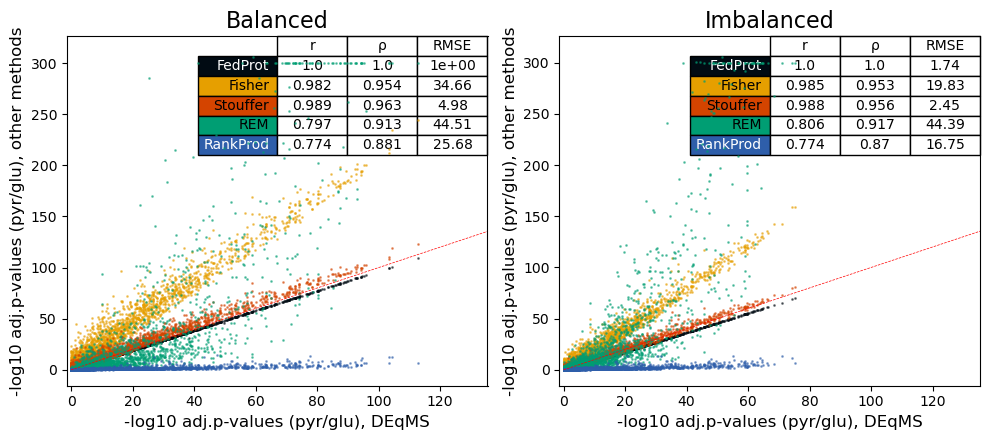

In [55]:
# colors = ['#010B13', '#E69F00', '#CC79A7', '#009E73', '#56B4E9']
colors = ["#010B13","#E69F00","#D44400","#009E73","#2E5EAA"]
#colors = ["#010B13","#D44500","#FFFB0A","#009E73","#2E5EAA"]

corrs = plt_results(log_dfs_HR, text = "", colors = colors)
corrs

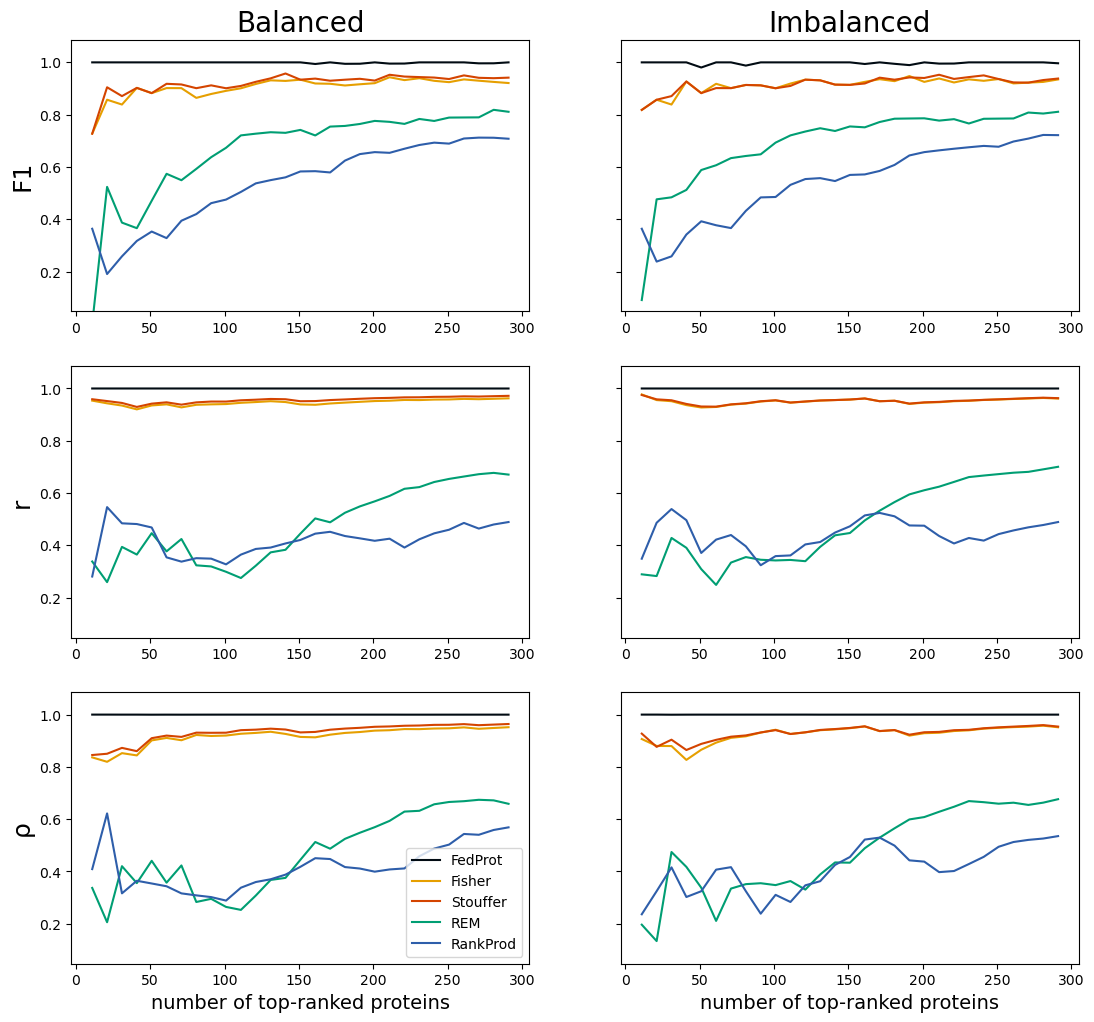

In [58]:
min_n_genes = 11
step = 10
max_n_genes = 300

data = plot_stats_for_topN(log_dfs_HR,
                           datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["F1", "r", "ρ"],
                           min_n_genes=min_n_genes,
                           max_n_genes = max_n_genes,
                           step=step,
                           colors=colors,
                           lfc_thr=0.58, adj_pval_thr = -np.log10(0.01),
                           sharey=True)

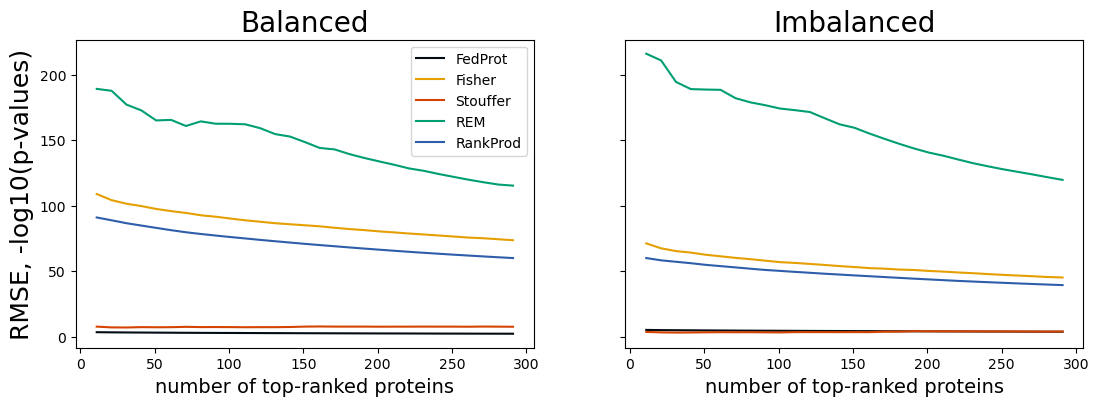

In [171]:
min_n_genes = 11
step = 10
max_n_genes = 300

data = plot_stats_for_topN(log_dfs_HR,
                           datasets = ["Balanced", 'Imbalanced'], #,"Mild Imbalance","Strong Imbalance"
                           metrics=["RMSE"],
                           min_n_genes=min_n_genes,
                           max_n_genes = max_n_genes,
                           step=step,
                           colors=colors,
                           lfc_thr=0.58, adj_pval_thr = -np.log10(0.01),
                           sharey=True)

In [59]:
methods = ['FedProt', 'Fisher', 'Stouffer', 'REM', 'RankProd']
results = []


for method in methods:
    # Calculate Pearson correlation coefficients
    corr_coeff_logFC = np.corrcoef(log_dfs['Balanced'][f"lfc_{method}"].values, central_results_balanced["logFC"])[0,1]
    corr_coeff_pvals = np.corrcoef(log_dfs['Balanced'][f"pv_{method}"].values, -np.log10(central_results_balanced["sca.adj.pval"].values))[0,1]
    
    # Calculate absolute differences
    diff_logFC = log_dfs['Balanced'][f"lfc_{method}"] - central_results_balanced["logFC"]
    diff_pval = log_dfs['Balanced'][f"pv_{method}"] - -np.log10(central_results_balanced["sca.adj.pval"])

    logFC_rmse = np.sqrt(np.sum(diff_logFC**2)/len(diff_logFC))
    pval_rmse = np.sqrt(np.sum(diff_pval**2)/len(diff_pval))

    
    # Appending results in a structured way
    results.append({
        ('Method', ''): method,
        ('logFC', 'Corr'): corr_coeff_logFC,
        ('logFC', 'Mean diff'): np.mean(np.abs(diff_logFC)),
        ('logFC', 'RMSE'): logFC_rmse,
        ('-log10 p-value', 'Corr'): corr_coeff_pvals,
        ('-log10 p-value', 'Mean diff'): np.mean(np.abs(diff_pval)),
        ('-log10 p-value', 'RMSE'): pval_rmse
    })

# Convert results to a DataFrame for presentation
df_results = pd.DataFrame(results)

# Display the results
df_results

,"(Method, )","(logFC, Corr)","(logFC, Mean diff)","(logFC, RMSE)","(-log10 p-value, Corr)","(-log10 p-value, Mean diff)","(-log10 p-value, RMSE)"
0,FedProt,1.000000,1.200453e-14,1.497457e-14,0.999912,0.626499,0.979206
1,Fisher,0.999883,3.008852e-03,1.143377e-02,0.981543,25.231003,34.662257
2,Stouffer,0.999883,3.008852e-03,1.143377e-02,0.988597,3.515973,4.975774
3,REM,0.999354,1.695829e-02,2.684837e-02,0.797312,17.497331,44.507374
4,RankProd,0.999883,3.008852e-03,1.143377e-02,0.774262,16.779640,25.679783


In [178]:
methods = ['FedProt', 'Fisher', 'Stouffer', 'REM', 'RankProd']
results = []


for method in methods:
    # Calculate Pearson correlation coefficients
    corr_coeff_logFC = np.corrcoef(log_dfs['Imbalanced'][f"lfc_{method}"].values, central_results_unbalanced["logFC"])[0,1]
    corr_coeff_pvals = np.corrcoef(log_dfs['Imbalanced'][f"pv_{method}"].values, -np.log10(central_results_unbalanced["sca.adj.pval"].values))[0,1]
    
    # Calculate absolute differences
    diff_logFC = log_dfs['Imbalanced'][f"lfc_{method}"] - central_results_unbalanced["logFC"]
    diff_pval = log_dfs['Imbalanced'][f"pv_{method}"] - -np.log10(central_results_unbalanced["sca.adj.pval"])

    logFC_rmse = np.sqrt(np.sum(diff_logFC**2)/len(diff_logFC))
    pval_rmse = np.sqrt(np.sum(diff_pval**2)/len(diff_pval))

    
    # Appending results in a structured way
    results.append({
        ('Method', ''): method,
        ('logFC', 'Corr'): corr_coeff_logFC,
        ('logFC', 'Mean diff'): np.mean(np.abs(diff_logFC)),
        ('logFC', 'RMSE'): logFC_rmse,
        ('-log10 p-value', 'Corr'): corr_coeff_pvals,
        ('-log10 p-value', 'Mean diff'): np.mean(np.abs(diff_pval)),
        ('-log10 p-value', 'RMSE'): pval_rmse
    })

# Convert results to a DataFrame for presentation
df_results = pd.DataFrame(results)

# Display the results
df_results

,"(Method, )","(logFC, Corr)","(logFC, Mean diff)","(logFC, RMSE)","(-log10 p-value, Corr)","(-log10 p-value, Mean diff)","(-log10 p-value, RMSE)"
0,FedProt,1.000000,1.039411e-14,1.291103e-14,0.999803,1.244904,1.738415
1,Fisher,0.998496,2.899771e-02,4.619837e-02,0.984504,13.268053,19.834199
2,Stouffer,0.998496,2.899771e-02,4.619837e-02,0.987974,1.656019,2.446450
3,REM,0.997948,3.406818e-02,4.839569e-02,0.805573,15.663273,44.393067
4,RankProd,0.998496,2.899771e-02,4.619837e-02,0.774234,10.883828,16.752694


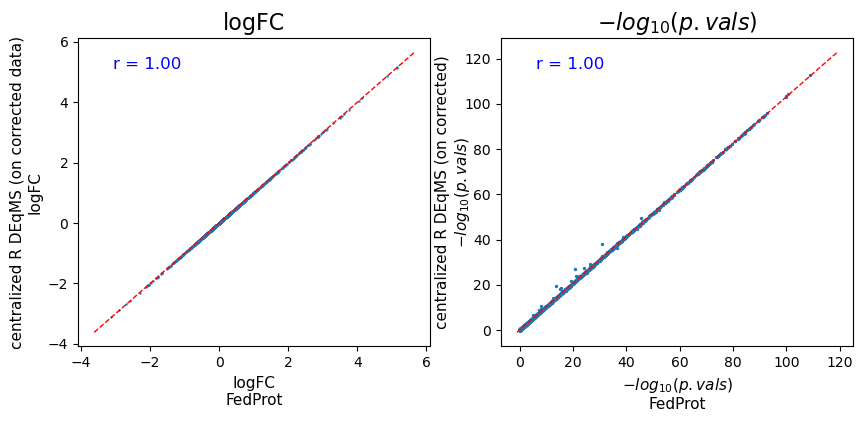

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=False)
axes[0].set_title("logFC", fontsize=16)
axes[0].scatter(x=log_dfs['Balanced']["lfc_FedProt"], y = central_results_balanced["logFC"], s=0.5)

# Calculate the Pearson correlation coefficients
corr_coeff_logFC = np.corrcoef(log_dfs['Balanced']["lfc_FedProt"].values, central_results_balanced["logFC"])[0,1]
corr_coeff_pvals = np.corrcoef(log_dfs['Balanced']["pv_FedProt"].values, -np.log10(central_results_balanced["sca.adj.pval"].values))[0,1]

# Add correlation coefficient to the plots using annotate
axes[0].annotate(f'r = {corr_coeff_logFC:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')

axes[1].annotate(f'r = {corr_coeff_pvals:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')


xmin = np.min(log_dfs['Balanced']["lfc_FedProt"])
xmax = np.max(log_dfs['Balanced']["lfc_FedProt"])
ymin = np.min(central_results_balanced["logFC"])
ymax = np.max(central_results_balanced["logFC"])
axes[0].plot([xmin-0.5,xmax+0.5],[xmin-0.5,xmax+0.5],color = "red", linestyle='dashed',linewidth=1)
axes[0].set_xlabel('logFC\nFedProt', fontsize=11)
axes[0].set_ylabel('centralized R DEqMS (on corrected data)\nlogFC', fontsize=11)


# Improve title aesthetics
axes[1].set_title("$-log_{10}(p.vals)$", fontsize=16)
axes[1].scatter(x=log_dfs['Balanced']["pv_FedProt"].values, y = -np.log10(central_results_balanced["sca.adj.pval"].values),s=2)
axes[1].set_xlabel('$-log_{10}(p.vals)$\nFedProt', fontsize=11)

xmax = max(log_dfs['Balanced']["pv_FedProt"])
ymax = max(-np.log10(central_results_balanced["sca.adj.pval"].values))
axes[1].plot([-1,xmax+10],[-1,ymax+10],color = "red", linestyle='dashed',linewidth=1)
tmp = axes[1].set_ylabel('centralized R DEqMS (on corrected)\n$-log_{10}(p.vals)$', fontsize=11, labelpad=-5)


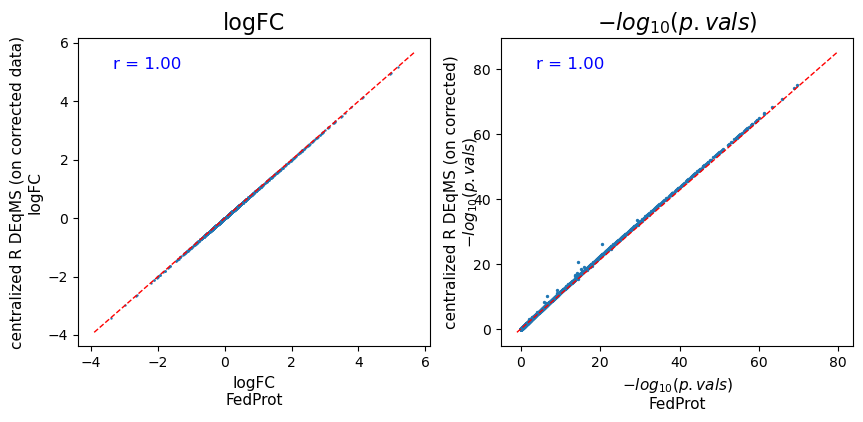

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=False)
axes[0].set_title("logFC", fontsize=16)
axes[0].scatter(x=log_dfs['Imbalanced']["lfc_FedProt"], y = central_results_unbalanced["logFC"], s=0.5)

# Calculate the Pearson correlation coefficients
corr_coeff_logFC = np.corrcoef(log_dfs['Imbalanced']["lfc_FedProt"].values, central_results_unbalanced["logFC"])[0,1]
corr_coeff_pvals = np.corrcoef(log_dfs['Imbalanced']["pv_FedProt"].values, -np.log10(central_results_unbalanced["sca.adj.pval"].values))[0,1]

# Add correlation coefficient to the plots using annotate
axes[0].annotate(f'r = {corr_coeff_logFC:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')

axes[1].annotate(f'r = {corr_coeff_pvals:.2f}', 
                 xy=(0.1, 0.9), xycoords='axes fraction', 
                 fontsize=12, color='blue')


xmin = np.min(log_dfs['Imbalanced']["lfc_FedProt"])
xmax = np.max(log_dfs['Imbalanced']["lfc_FedProt"])
ymin = np.min(central_results_unbalanced["logFC"])
ymax = np.max(central_results_unbalanced["logFC"])
axes[0].plot([xmin-0.5,xmax+0.5],[xmin-0.5,xmax+0.5],color = "red", linestyle='dashed',linewidth=1)
axes[0].set_xlabel('logFC\nFedProt', fontsize=11)
axes[0].set_ylabel('centralized R DEqMS (on corrected data)\nlogFC', fontsize=11)


# Improve title aesthetics
axes[1].set_title("$-log_{10}(p.vals)$", fontsize=16)
axes[1].scatter(x=log_dfs['Imbalanced']["pv_FedProt"].values, y = -np.log10(central_results_unbalanced["sca.adj.pval"].values),s=2)
axes[1].set_xlabel('$-log_{10}(p.vals)$\nFedProt', fontsize=11)

xmax = max(log_dfs['Imbalanced']["pv_FedProt"])
ymax = max(-np.log10(central_results_unbalanced["sca.adj.pval"].values))
axes[1].plot([-1,xmax+10],[-1,ymax+10],color = "red", linestyle='dashed',linewidth=1)
tmp = axes[1].set_ylabel('centralized R DEqMS (on corrected)\n$-log_{10}(p.vals)$', fontsize=11, labelpad=-5)
